- Problem Statement URL : https://www.kaggle.com/datasets/aadarshvelu/liver-cirrhosis-stage-classification

Preprocessing and Feature Engineering:

    - For all numerical type : get deciles distribution and check what is the percentage / ratio of data lying under each 10 percentile bucket.
    - For all numerical type : Filter at index which datapoint is reportyed greater than median.
    - For all numerical type : Filter at index what is the difference from the median of that column.
    - For all catgegorical type : use labelencoding.
    - For all catgegorical type : use onehotencoding --> **pd.get_dummies()**

**General Pointers:**

- concatinate all the data together as per index.
- keep an eye on the shape of the data.
- fit relevant model(s) and log there corresponding performence metric.
- Choose metric wisely. Check the class distribution of the target variable here --> Stage and based on that finalize the metric
- on the categorical side see if dropping onehotencoded features help in improving model accuracy .
- hyperparameter tuning with both GridSearch and RandomSearch and see if there is any significant amount of improvement in the metric or not.
- Make a dataframe based representatation that helps us to understand all the KPIs for tuned and untuned models.
- Load the inference dataframe.
- Perform the exact same preprocessing steps and check the shape of the data.
- predict on the inference dataframe.
- Load the inference actuals.
- Tally predictions made on inference dataframwe with inference actuals and record the general KPIs.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
LIVER_CIRRHOISIS_DATA_PATH = r"/content/liver_cirrhosis.csv"
data = pd.read_csv(LIVER_CIRRHOISIS_DATA_PATH, encoding_errors = "ignore")
data_for_inference = data.loc[20000:]
data = data.loc[:19999]
print(f"Shape of the data is : {data.shape}")
data.head()


In [ ]:
data_for_inference.shape

In [ ]:
data_for_inference

In [ ]:
#### Preparing data for inference.
data_for_inference_actuals = data_for_inference["Stage"]
data_for_inference.drop(["Stage"], axis =1, inplace = True )
data_for_inference.to_csv("./data_for_inference.csv", index = False)
data_for_inference_actuals.to_csv("./inference_actuals.csv", index = False)
data.to_csv("Training_and_Valiation_data.csv", index = False)
data_for_inference.shape

In [ ]:
LIVER_CIRRHOISIS_DATA_PATH = r"/content/Training_and_Valiation_data.csv"
data1= pd.read_csv(LIVER_CIRRHOISIS_DATA_PATH, encoding_errors = "ignore")
print(f"Shape of the data1 is : {data1.shape}")
data1.head()

In [ ]:
data.info()

In [ ]:
numerical_list = []
categorical_list = []

for col in data.columns:
  if data[col].dtype == "object":
    categorical_list.append(col)
  else:
    numerical_list.append(col)

In [ ]:
numerical_list

In [ ]:
data.isnull().sum()

In [ ]:
# Visualize missing data
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [ ]:
# Deciling for N_days
N_Days_DECILE1_list = []
N_Days_DECILE2_list = []
N_Days_DECILE3_list = []
N_Days_DECILE4_list = []
N_Days_DECILE5_list = []
N_Days_DECILE6_list = []
N_Days_DECILE7_list = []
N_Days_DECILE8_list = []
N_Days_DECILE8_list = []
N_Days_DECILE10_list = []

ndays_range = data["N_Days"].max() - data["N_Days"].min()
uniform_difference = ndays_range/10
print(f"ndays_range: {ndays_range}")
print(f"uniform_difference : {uniform_difference}")

N_Days_DECILE1_threshold = data["N_Days"].min() + uniform_difference
N_Days_DECILE2_threshold = N_Days_DECILE1_threshold + uniform_difference
N_Days_DECILE3_threshold = N_Days_DECILE2_threshold + uniform_difference
N_Days_DECILE4_threshold = N_Days_DECILE3_threshold + uniform_difference
N_Days_DECILE5_threshold = N_Days_DECILE4_threshold + uniform_difference
N_Days_DECILE6_threshold = N_Days_DECILE5_threshold + uniform_difference
N_Days_DECILE7_threshold = N_Days_DECILE6_threshold + uniform_difference
N_Days_DECILE8_threshold = N_Days_DECILE7_threshold + uniform_difference
N_Days_DECILE9_threshold = N_Days_DECILE8_threshold + uniform_difference
N_Days_DECILE10_threshold = N_Days_DECILE9_threshold + uniform_difference

print(f"N_Days_DECILE1_threshold : {N_Days_DECILE1_threshold}")
print(f"N_Days_DECILE2_threshold : {N_Days_DECILE2_threshold}")
print(f"N_Days_DECILE3_threshold : {N_Days_DECILE3_threshold}")
print(f"N_Days_DECILE4_threshold : {N_Days_DECILE4_threshold}")
print(f"N_Days_DECILE5_threshold : {N_Days_DECILE5_threshold}")
print(f"N_Days_DECILE6_threshold : {N_Days_DECILE6_threshold}")
print(f"N_Days_DECILE7_threshold : {N_Days_DECILE7_threshold}")
print(f"N_Days_DECILE8_threshold : {N_Days_DECILE8_threshold}")
print(f"N_Days_DECILE9_threshold : {N_Days_DECILE9_threshold}")
print(f"N_Days_DECILE10_threshold : {N_Days_DECILE10_threshold}")

In [121]:
N_Days_difference_from_median = []
for n_days in data["N_Days"]:
    difference = data["N_Days"].median() - n_days
    N_Days_difference_from_median.append(difference)

N_Days_difference_from_median_dataframe =  pd.DataFrame({"N_Days_MEDIAN_Difference": N_Days_difference_from_median})
# N_Days_difference_from_median_dataframe
data = pd.concat([data,N_Days_difference_from_median_dataframe], axis = 1)

<Axes: >

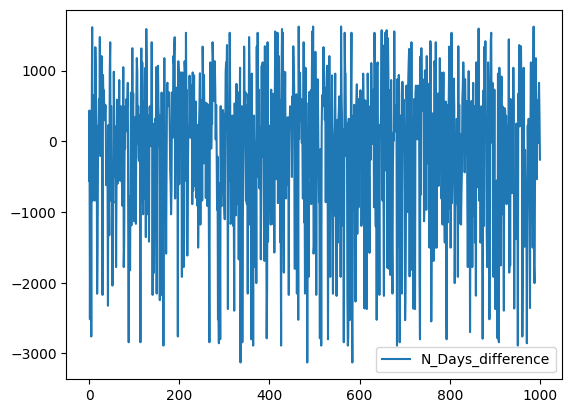

In [122]:
pd.DataFrame({"N_Days_difference": N_Days_difference_from_median}).loc[:1000].plot()

<Axes: >

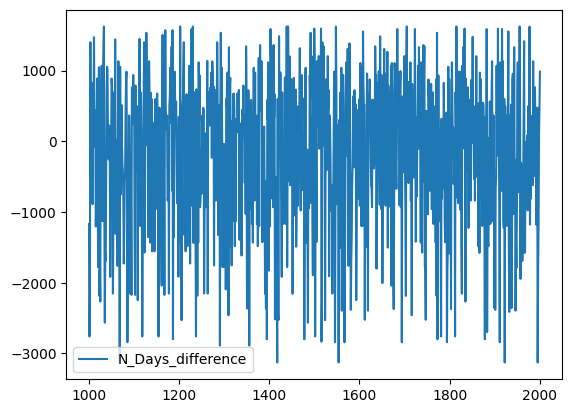

In [123]:
pd.DataFrame({"N_Days_difference": N_Days_difference_from_median}).loc[1001:2000].plot()

In [124]:
data["N_Days"].unique()

array([2221, 1230, 4184, 2090, 2105, 4427, 1418,   51, 2504, 1012, 1149,
       1037, 1234,  334,  733, 1581, 1443, 3823, 3170, 1735, 1558, 1067,
       1666,  191, 1874, 1690,  460, 2176, 3839,  727, 1092,  943, 1347,
       1368, 1170, 2286, 2050, 2224, 2022, 3992, 1434, 2338, 2995,  694,
        264, 2503, 1168, 2365, 3707, 2475, 2540,  681, 2171, 1455, 1769,
       3445, 1077, 2267, 2081, 1908,  799, 2111, 1419, 2255, 2576, 2202,
        617, 3099, 1568, 1525,  839, 3030, 4509, 2609, 2442, 3492, 2195,
        976, 2855, 1504,  348, 1301,  989, 2644, 2797, 1702, 1320, 2834,
       1103,  489, 1899, 1945, 1297,  994,  352, 2527,  549,  939, 2698,
       1342, 1831,  625, 3021,   77,  611, 2635, 3086, 1191, 1462, 1783,
       3527, 2721, 1725, 1343, 2103, 3820, 1785, 1656,  597, 1375, 1560,
       3913, 3850, 4556, 2583, 2556, 3255,  859,  837,  974, 2071, 2332,
       1119, 1615,  559,  326,  193, 1349,  904, 1293,  533,  708, 2272,
        691, 3584, 2990, 2976,  130, 3282, 2288, 16

In [125]:
data["N_Days"].nunique()

546

In [126]:
n_days_greater_than_less_than_median_list = []
for n_day in data["N_Days"]:
    if n_day > data["N_Days"].median():
        n_days_greater_than_less_than_median_list.append(1)
    else:
        n_days_greater_than_less_than_median_list.append(0)

In [127]:
N_Days_GREATER_THAN_MEDIAN_df = pd.DataFrame({"N_Days_GREATER_THAN_MEDIAN" : n_days_greater_than_less_than_median_list})

In [128]:
data = pd.concat([data, N_Days_GREATER_THAN_MEDIAN_df], axis = 1)

In [129]:
data[["N_Days", "N_Days_GREATER_THAN_MEDIAN"]]

N_Days  N_Days_GREATER_THAN_MEDIAN
0        2221                           1
1        1230                           0
2        4184                           1
3        2090                           1
4        2105                           1
...       ...                         ...
19995    4196                           1
19996    4256                           1
19997    2504                           1
19998    1030                           0
19999    1329                           0

[20000 rows x 2 columns]

In [130]:
data["N_Days_GREATER_THAN_MEDIAN"].value_counts()

N_Days_GREATER_THAN_MEDIAN
0    10049
1     9951
Name: count, dtype: int64

**For all numerical type : get deciles distribution and check what is the percentage / ratio of data lying under each 10 percentile bucket.**

Step 1: Sort the data(sorts it in ascending order using the sort_values() method.)

In [131]:
sorted_numerical_list = pd.Series(numerical_list).sort_values()
sorted_numerical_list

1               Age
4           Albumin
6          Alk_Phos
2         Bilirubin
3       Cholesterol
5            Copper
0            N_Days
9         Platelets
10      Prothrombin
7              SGOT
11            Stage
8     Tryglicerides
dtype: object

Step 2: Determine the position of each decile

In [132]:
n = len(sorted_numerical_list)
deciles = [(i + 1) * n // 10 for i in range(10)]
# This equation evenly divides the sorted data into 10 equal parts,
 # ensuring that each decile represents 10% of the data.


In [133]:
n

12

In [134]:
deciles

[1, 2, 3, 4, 6, 7, 8, 9, 10, 12]

Step 3: Calculate the value of each decile

In [135]:
decile_values = [sorted_numerical_list[decile - 1] for decile in deciles]
#We subtract 1 from each decile position because Python indexing starts from 0.

In [136]:
decile_values

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Stage']

In [137]:
numerical_list

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

Step 4: Determine the percentage/ratio of data lying under each decile

In [138]:
percentiles = [decile / n * 100 for decile in deciles]

In [139]:
percentiles
#We divide each decile position (decile) by the total number of data points (n)
#and multiply by 100 to convert it into a percentage.

[8.333333333333332,
 16.666666666666664,
 25.0,
 33.33333333333333,
 50.0,
 58.333333333333336,
 66.66666666666666,
 75.0,
 83.33333333333334,
 100.0]

In [140]:
# Print deciles and percentage/ratio
for i in range(10):
    print(f"Decile {i+1}: Value = {decile_values[i]}, Percentage/Ratio = {percentiles[i]}%")

Decile 1: Value = N_Days, Percentage/Ratio = 8.333333333333332%
Decile 2: Value = Age, Percentage/Ratio = 16.666666666666664%
Decile 3: Value = Bilirubin, Percentage/Ratio = 25.0%
Decile 4: Value = Cholesterol, Percentage/Ratio = 33.33333333333333%
Decile 5: Value = Copper, Percentage/Ratio = 50.0%
Decile 6: Value = Alk_Phos, Percentage/Ratio = 58.333333333333336%
Decile 7: Value = SGOT, Percentage/Ratio = 66.66666666666666%
Decile 8: Value = Tryglicerides, Percentage/Ratio = 75.0%
Decile 9: Value = Platelets, Percentage/Ratio = 83.33333333333334%
Decile 10: Value = Stage, Percentage/Ratio = 100.0%


In [141]:
# Create DataFrame
decile_df = pd.DataFrame({
    'Decile Value': decile_values,
    'Percentage/Ratio': percentiles
}, index=range(1, 11))

# Print DataFrame
print(decile_df)

     Decile Value  Percentage/Ratio
1          N_Days          8.333333
2             Age         16.666667
3       Bilirubin         25.000000
4     Cholesterol         33.333333
5          Copper         50.000000
6        Alk_Phos         58.333333
7            SGOT         66.666667
8   Tryglicerides         75.000000
9       Platelets         83.333333
10          Stage        100.000000


In [142]:
data.describe()

N_Days           Age     Bilirubin   Cholesterol       Albumin  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean    1880.30300  18469.275550      3.490935    372.456173      3.483563   
std     1098.23497   3717.264426      4.812287    193.867122      0.371234   
min       41.00000   9598.000000      0.300000    120.000000      1.960000   
25%     1077.00000  15694.000000      0.800000    275.000000      3.310000   
50%     1666.00000  18460.000000      1.300000    369.510563      3.500000   
75%     2573.00000  20819.000000      3.500000    369.510563      3.750000   
max     4795.00000  28650.000000     28.000000   1775.000000      4.640000   

             Copper      Alk_Phos          SGOT  Tryglicerides     Platelets  \
count  20000.000000  20000.000000  20000.000000   20000.000000  20000.000000   
mean     101.226181   2022.670362    123.418525     123.948473    255.005373   
std       73.406398   1855.429599     47.590886      53.310888     99.113309   
min        4.000000    289.000000     26.350000      33.000000     62.000000   
25%       52.000000   1040.000000     92.000000      91.000000    185.000000   
50%       97.648387   1828.000000    122.556346     124.702128    251.000000   
75%      108.000000   1982.655769    136.400000     130.000000    309.000000   
max      588.000000  13862.400000    457.250000     598.000000    721.000000   

        Prothrombin         Stage  N_Days_MEDIAN_Difference  \
count  20000.000000  20000.000000               20000.00000   
mean      10.740409      1.988700                -214.30300   
std        0.891071      0.819149                1098.23497   
min        9.000000      1.000000               -3129.00000   
25%       10.000000      1.000000                -907.00000   
50%       10.600000      2.000000                   0.00000   
75%       11.200000      3.000000                 589.00000   
max       18.000000      3.000000                1625.00000   

       N_Days_GREATER_THAN_MEDIAN  
count                20000.000000  
mean                     0.497550  
std                      0.500006  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      1.000000  
max                      1.000000

**For all numerical type : Filter at index which datapoint is reported greater than median.**

In [143]:
df1 = data.select_dtypes(include=['int64','float'])
df1

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0        2221  18499        0.5        149.0     4.04   227.0     598.0   
1        1230  19724        0.5        219.0     3.93    22.0     663.0   
2        4184  11839        0.5        320.0     3.54    51.0    1243.0   
3        2090  16467        0.7        255.0     3.74    23.0    1024.0   
4        2105  21699        1.9        486.0     3.54    74.0    1052.0   
...       ...    ...        ...          ...      ...     ...       ...   
19995    4196  17841        1.2        258.0     3.57    79.0    2201.0   
19996    4256  16034        0.6        216.0     3.94    28.0     601.0   
19997    2504  16094        0.5        120.0     3.61    53.0     804.0   
19998    1030  18302        1.1        412.0     3.99   103.0    1293.0   
19999    1329  14610        8.6        546.0     3.73    84.0    1070.0   

         SGOT  Tryglicerides  Platelets  Prothrombin  Stage  \
0       52.70           57.0      256.0          9.9      1   
1       45.00           75.0      220.0         10.8      2   
2      122.45           80.0      225.0         10.0      2   
3       77.50           58.0      151.0         10.2      2   
4      108.50          109.0      151.0         11.5      1   
...       ...            ...        ...          ...    ...   
19995  120.90           76.0      410.0         11.5      3   
19996   60.45          188.0      211.0         13.0      1   
19997  110.05           52.0      271.0         10.6      2   
19998   91.00          113.0      182.0         10.8      3   
19999  127.00          153.0      145.0         10.4      2   

       N_Days_MEDIAN_Difference  N_Days_GREATER_THAN_MEDIAN  
0                        -555.0                           1  
1                         436.0                           0  
2                       -2518.0                           1  
3                        -424.0                           1  
4                        -439.0                           1  
...                         ...                         ...  
19995                   -2530.0                           1  
19996                   -2590.0                           1  
19997                    -838.0                           1  
19998                     636.0                           0  
19999                     337.0                           0  

[20000 rows x 14 columns]

In [144]:
medians=df1.median()
medians


N_Days                         1666.000000
Age                           18460.000000
Bilirubin                         1.300000
Cholesterol                     369.510563
Albumin                           3.500000
Copper                           97.648387
Alk_Phos                       1828.000000
SGOT                            122.556346
Tryglicerides                   124.702128
Platelets                       251.000000
Prothrombin                      10.600000
Stage                             2.000000
N_Days_MEDIAN_Difference          0.000000
N_Days_GREATER_THAN_MEDIAN        0.000000
dtype: float64

In [145]:
filtered_df1 = df1[df1 > medians]

In [146]:
data.dtypes

N_Days                          int64
Status                         object
Drug                           object
Age                             int64
Sex                            object
Ascites                        object
Hepatomegaly                   object
Spiders                        object
Edema                          object
Bilirubin                     float64
Cholesterol                   float64
Albumin                       float64
Copper                        float64
Alk_Phos                      float64
SGOT                          float64
Tryglicerides                 float64
Platelets                     float64
Prothrombin                   float64
Stage                           int64
N_Days_MEDIAN_Difference      float64
N_Days_GREATER_THAN_MEDIAN      int64
dtype: object

In [147]:
filtered_df1

N_Days      Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0      2221.0  18499.0        NaN          NaN     4.04   227.0       NaN   
1         NaN  19724.0        NaN          NaN     3.93     NaN       NaN   
2      4184.0      NaN        NaN          NaN     3.54     NaN       NaN   
3      2090.0      NaN        NaN          NaN     3.74     NaN       NaN   
4      2105.0  21699.0        1.9        486.0     3.54     NaN       NaN   
...       ...      ...        ...          ...      ...     ...       ...   
19995  4196.0      NaN        NaN          NaN     3.57     NaN    2201.0   
19996  4256.0      NaN        NaN          NaN     3.94     NaN       NaN   
19997  2504.0      NaN        NaN          NaN     3.61     NaN       NaN   
19998     NaN      NaN        NaN        412.0     3.99   103.0       NaN   
19999     NaN      NaN        8.6        546.0     3.73     NaN       NaN   

        SGOT  Tryglicerides  Platelets  Prothrombin  Stage  \
0        NaN            NaN      256.0          NaN    NaN   
1        NaN            NaN        NaN         10.8    NaN   
2        NaN            NaN        NaN          NaN    NaN   
3        NaN            NaN        NaN          NaN    NaN   
4        NaN            NaN        NaN         11.5    NaN   
...      ...            ...        ...          ...    ...   
19995    NaN            NaN      410.0         11.5    3.0   
19996    NaN          188.0        NaN         13.0    NaN   
19997    NaN            NaN      271.0          NaN    NaN   
19998    NaN            NaN        NaN         10.8    3.0   
19999  127.0          153.0        NaN          NaN    NaN   

       N_Days_MEDIAN_Difference  N_Days_GREATER_THAN_MEDIAN  
0                           NaN                         1.0  
1                         436.0                         NaN  
2                           NaN                         1.0  
3                           NaN                         1.0  
4                           NaN                         1.0  
...                         ...                         ...  
19995                       NaN                         1.0  
19996                       NaN                         1.0  
19997                       NaN                         1.0  
19998                     636.0                         NaN  
19999                     337.0                         NaN  

[20000 rows x 14 columns]

**Alternate method**

In [148]:
# Filter rows where numerical values are greater than median for each column
filtered_rows = pd.DataFrame() #Initialize an Empty DataFrame:
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:  # Filter numerical columns
        filtered_rows = pd.concat([filtered_rows, data[data[col] > medians[col]]])

filtered_rows

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0        2221      C          Placebo  18499   F       N            Y       N   
2        4184      C          Placebo  11839   F       N            N       N   
3        2090      D          Placebo  16467   F       N            N       N   
4        2105      D          Placebo  21699   F       N            Y       N   
5        4427      C          Placebo  16418   F       N            N       N   
...       ...    ...              ...    ...  ..     ...          ...     ...   
19993    2168      C  D-penicillamine  21610   F       N            N       N   
19994    2286      D  D-penicillamine  18806   F       N            N       N   
19995    4196      C          Placebo  17841   F       N            Y       N   
19996    4256      C          Placebo  16034   M       N            N       N   
19997    2504      C          Placebo  16094   F       N            N       N   

      Edema  Bilirubin  ...  Albumin      Copper      Alk_Phos        SGOT  \
0         N        0.5  ...     4.04  227.000000    598.000000   52.700000   
2         N        0.5  ...     3.54   51.000000   1243.000000  122.450000   
3         N        0.7  ...     3.74   23.000000   1024.000000   77.500000   
4         N        1.9  ...     3.54   74.000000   1052.000000  108.500000   
5         N        1.9  ...     3.70  281.000000  10396.800000  188.340000   
...     ...        ...  ...      ...         ...           ...         ...   
19993     N        0.5  ...     3.68   20.000000    856.000000   55.800000   
19994     N        1.8  ...     3.64   97.648387   1982.655769  122.556346   
19995     N        1.2  ...     3.57   79.000000   2201.000000  120.900000   
19996     N        0.6  ...     3.94   28.000000    601.000000   60.450000   
19997     N        0.5  ...     3.61   53.000000    804.000000  110.050000   

       Tryglicerides  Platelets  Prothrombin  Stage  N_Days_MEDIAN_Difference  \
0          57.000000      256.0          9.9      1                    -555.0   
2          80.000000      225.0         10.0      2                   -2518.0   
3          58.000000      151.0         10.2      2                    -424.0   
4         109.000000      151.0         11.5      1                    -439.0   
5         178.000000      327.0         10.4      2                   -2761.0   
...              ...        ...          ...    ...                       ...   
19993     124.702128      146.0         10.4      2                    -502.0   
19994     124.702128      271.0          9.6      1                    -620.0   
19995      76.000000      410.0         11.5      3                   -2530.0   
19996     188.000000      211.0         13.0      1                   -2590.0   
19997      52.000000      271.0         10.6      2                    -838.0   

       N_Days_GREATER_THAN_MEDIAN  
0                               1  
2                               1  
3                               1  
4                               1  
5                               1  
...                           ...  
19993                           1  
19994                           1  
19995                           1  
19996                           1  
19997                           1  

[117381 rows x 21 columns]

- **For all numerical type : Filter at index what is the difference from the median of that column**

calculate the absolute difference between each value and the median of its respective column.

In [149]:
ab_value=abs(df1)

In [150]:
ab_value

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0        2221  18499        0.5        149.0     4.04   227.0     598.0   
1        1230  19724        0.5        219.0     3.93    22.0     663.0   
2        4184  11839        0.5        320.0     3.54    51.0    1243.0   
3        2090  16467        0.7        255.0     3.74    23.0    1024.0   
4        2105  21699        1.9        486.0     3.54    74.0    1052.0   
...       ...    ...        ...          ...      ...     ...       ...   
19995    4196  17841        1.2        258.0     3.57    79.0    2201.0   
19996    4256  16034        0.6        216.0     3.94    28.0     601.0   
19997    2504  16094        0.5        120.0     3.61    53.0     804.0   
19998    1030  18302        1.1        412.0     3.99   103.0    1293.0   
19999    1329  14610        8.6        546.0     3.73    84.0    1070.0   

         SGOT  Tryglicerides  Platelets  Prothrombin  Stage  \
0       52.70           57.0      256.0          9.9      1   
1       45.00           75.0      220.0         10.8      2   
2      122.45           80.0      225.0         10.0      2   
3       77.50           58.0      151.0         10.2      2   
4      108.50          109.0      151.0         11.5      1   
...       ...            ...        ...          ...    ...   
19995  120.90           76.0      410.0         11.5      3   
19996   60.45          188.0      211.0         13.0      1   
19997  110.05           52.0      271.0         10.6      2   
19998   91.00          113.0      182.0         10.8      3   
19999  127.00          153.0      145.0         10.4      2   

       N_Days_MEDIAN_Difference  N_Days_GREATER_THAN_MEDIAN  
0                         555.0                           1  
1                         436.0                           0  
2                        2518.0                           1  
3                         424.0                           1  
4                         439.0                           1  
...                         ...                         ...  
19995                    2530.0                           1  
19996                    2590.0                           1  
19997                     838.0                           1  
19998                     636.0                           0  
19999                     337.0                           0  

[20000 rows x 14 columns]

In [151]:
difference_from_median=ab_value-medians
difference_from_median

N_Days     Age  Bilirubin  Cholesterol  Albumin      Copper  Alk_Phos  \
0       555.0    39.0       -0.8  -220.510563     0.54  129.351613   -1230.0   
1      -436.0  1264.0       -0.8  -150.510563     0.43  -75.648387   -1165.0   
2      2518.0 -6621.0       -0.8   -49.510563     0.04  -46.648387    -585.0   
3       424.0 -1993.0       -0.6  -114.510563     0.24  -74.648387    -804.0   
4       439.0  3239.0        0.6   116.489437     0.04  -23.648387    -776.0   
...       ...     ...        ...          ...      ...         ...       ...   
19995  2530.0  -619.0       -0.1  -111.510563     0.07  -18.648387     373.0   
19996  2590.0 -2426.0       -0.7  -153.510563     0.44  -69.648387   -1227.0   
19997   838.0 -2366.0       -0.8  -249.510563     0.11  -44.648387   -1024.0   
19998  -636.0  -158.0       -0.2    42.489437     0.49    5.351613    -535.0   
19999  -337.0 -3850.0        7.3   176.489437     0.23  -13.648387    -758.0   

            SGOT  Tryglicerides  Platelets  Prothrombin  Stage  \
0     -69.856346     -67.702128        5.0         -0.7   -1.0   
1     -77.556346     -49.702128      -31.0          0.2    0.0   
2      -0.106346     -44.702128      -26.0         -0.6    0.0   
3     -45.056346     -66.702128     -100.0         -0.4    0.0   
4     -14.056346     -15.702128     -100.0          0.9   -1.0   
...          ...            ...        ...          ...    ...   
19995  -1.656346     -48.702128      159.0          0.9    1.0   
19996 -62.106346      63.297872      -40.0          2.4   -1.0   
19997 -12.506346     -72.702128       20.0          0.0    0.0   
19998 -31.556346     -11.702128      -69.0          0.2    1.0   
19999   4.443654      28.297872     -106.0         -0.2    0.0   

       N_Days_MEDIAN_Difference  N_Days_GREATER_THAN_MEDIAN  
0                         555.0                         1.0  
1                         436.0                         0.0  
2                        2518.0                         1.0  
3                         424.0                         1.0  
4                         439.0                         1.0  
...                         ...                         ...  
19995                    2530.0                         1.0  
19996                    2590.0                         1.0  
19997                     838.0                         1.0  
19998                     636.0                         0.0  
19999                     337.0                         0.0  

[20000 rows x 14 columns]

In [152]:
threshold=4
filtered_df1= difference_from_median > threshold

filtered_df1

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0        True   True      False        False    False    True     False   
1       False   True      False        False    False   False     False   
2        True  False      False        False    False   False     False   
3        True  False      False        False    False   False     False   
4        True   True      False         True    False   False     False   
...       ...    ...        ...          ...      ...     ...       ...   
19995    True  False      False        False    False   False      True   
19996    True  False      False        False    False   False     False   
19997    True  False      False        False    False   False     False   
19998   False  False      False         True    False    True     False   
19999   False  False       True         True    False   False     False   

        SGOT  Tryglicerides  Platelets  Prothrombin  Stage  \
0      False          False       True        False  False   
1      False          False      False        False  False   
2      False          False      False        False  False   
3      False          False      False        False  False   
4      False          False      False        False  False   
...      ...            ...        ...          ...    ...   
19995  False          False       True        False  False   
19996  False           True      False        False  False   
19997  False          False       True        False  False   
19998  False          False      False        False  False   
19999   True           True      False        False  False   

       N_Days_MEDIAN_Difference  N_Days_GREATER_THAN_MEDIAN  
0                          True                       False  
1                          True                       False  
2                          True                       False  
3                          True                       False  
4                          True                       False  
...                         ...                         ...  
19995                      True                       False  
19996                      True                       False  
19997                      True                       False  
19998                      True                       False  
19999                      True                       False  

[20000 rows x 14 columns]

In [153]:
# Define difference threshold
threshold = 3  # Adjust as needed

# Filter DataFrame based on the condition
filtered_data = data[data['N_Days_MEDIAN_Difference'] > threshold]

filtered_data

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
1        1230      C          Placebo  19724   M       Y            N       Y   
6        1418      C          Placebo  23011   F       Y            N       Y   
7          51      D          Placebo  24107   F       Y            N       Y   
9        1012      D          Placebo  22280   M       Y            N       Y   
10       1149      C          Placebo  11167   M       N            N       N   
...       ...    ...              ...    ...  ..     ...          ...     ...   
19985    1360      D  D-penicillamine  24020   M       N            N       N   
19990    1347     CL          Placebo  18993   F       Y            N       Y   
19992    1235      D  D-penicillamine  23241   F       N            N       Y   
19998    1030      C          Placebo  18302   M       N            N       N   
19999    1329      C          Placebo  14610   F       Y            N       Y   

      Edema  Bilirubin  ...  Albumin      Copper      Alk_Phos        SGOT  \
1         N        0.5  ...     3.93   22.000000    663.000000   45.000000   
6         N        1.3  ...     3.44   75.000000   1082.000000   85.000000   
7         Y       12.6  ...     2.74  140.000000    918.000000  147.250000   
9         S        1.4  ...     3.48  210.000000    516.000000   96.100000   
10        N        0.8  ...     3.56   52.000000    955.000000  130.000000   
...     ...        ...  ...      ...         ...           ...         ...   
19985     N        1.8  ...     3.94  121.000000  10165.000000   79.980000   
19990     N        1.7  ...     3.24   97.648387   1982.655769  122.556346   
19992     N        3.8  ...     3.22   96.000000   2716.000000  210.800000   
19998     N        1.1  ...     3.99  103.000000   1293.000000   91.000000   
19999     N        8.6  ...     3.73   84.000000   1070.000000  127.000000   

       Tryglicerides  Platelets  Prothrombin  Stage  N_Days_MEDIAN_Difference  \
1          75.000000      220.0         10.8      2                     436.0   
6         195.000000      156.0         10.3      2                     248.0   
7         143.000000      150.0         11.1      3                    1615.0   
9          55.000000      259.0         10.1      3                     654.0   
10        177.000000      344.0         10.5      1                     517.0   
...              ...        ...          ...    ...                       ...   
19985     219.000000      213.0         11.0      2                     306.0   
19990     124.702128      231.0         10.5      2                     319.0   
19992     113.000000      228.0         10.6      1                     431.0   
19998     113.000000      182.0         10.8      3                     636.0   
19999     153.000000      145.0         10.4      2                     337.0   

       N_Days_GREATER_THAN_MEDIAN  
1                               0  
6                               0  
7                               0  
9                               0  
10                              0  
...                           ...  
19985                           0  
19990                           0  
19992                           0  
19998                           0  
19999                           0  

[9989 rows x 21 columns]

In [154]:

# Calculate the frequency distribution for each categorical variable
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
categorical_distributions = {col: data[col].value_counts()
for col in categorical_columns}

for col, distribution in categorical_distributions.items():
    print(f"Distribution for {col}:")
    print(distribution)
    print()

Distribution for Status:
Status
C     10667
D      7630
CL     1703
Name: count, dtype: int64

Distribution for Drug:
Drug
Placebo            12659
D-penicillamine     7341
Name: count, dtype: int64

Distribution for Sex:
Sex
F    17654
M     2346
Name: count, dtype: int64

Distribution for Ascites:
Ascites
N    13549
Y     6451
Name: count, dtype: int64

Distribution for Hepatomegaly:
Hepatomegaly
N    12008
Y     7992
Name: count, dtype: int64

Distribution for Spiders:
Spiders
N    11012
Y     8988
Name: count, dtype: int64

Distribution for Edema:
Edema
N    15953
S     3135
Y      912
Name: count, dtype: int64



In [155]:
threshold=4
filtered_df1= df1[df1['N_Days_MEDIAN_Difference'] >threshold]

filtered_df1

N_Days    Age  Bilirubin  Cholesterol  Albumin      Copper  \
1        1230  19724        0.5   219.000000     3.93   22.000000   
6        1418  23011        1.3   291.000000     3.44   75.000000   
7          51  24107       12.6   200.000000     2.74  140.000000   
9        1012  22280        1.4   176.000000     3.48  210.000000   
10       1149  11167        0.8   271.000000     3.56   52.000000   
...       ...    ...        ...          ...      ...         ...   
19985    1360  24020        1.8   416.000000     3.94  121.000000   
19990    1347  18993        1.7   369.510563     3.24   97.648387   
19992    1235  23241        3.8   426.000000     3.22   96.000000   
19998    1030  18302        1.1   412.000000     3.99  103.000000   
19999    1329  14610        8.6   546.000000     3.73   84.000000   

           Alk_Phos        SGOT  Tryglicerides  Platelets  Prothrombin  Stage  \
1        663.000000   45.000000      75.000000      220.0         10.8      2   
6       1082.000000   85.000000     195.000000      156.0         10.3      2   
7        918.000000  147.250000     143.000000      150.0         11.1      3   
9        516.000000   96.100000      55.000000      259.0         10.1      3   
10       955.000000  130.000000     177.000000      344.0         10.5      1   
...             ...         ...            ...        ...          ...    ...   
19985  10165.000000   79.980000     219.000000      213.0         11.0      2   
19990   1982.655769  122.556346     124.702128      231.0         10.5      2   
19992   2716.000000  210.800000     113.000000      228.0         10.6      1   
19998   1293.000000   91.000000     113.000000      182.0         10.8      3   
19999   1070.000000  127.000000     153.000000      145.0         10.4      2   

       N_Days_MEDIAN_Difference  N_Days_GREATER_THAN_MEDIAN  
1                         436.0                           0  
6                         248.0                           0  
7                        1615.0                           0  
9                         654.0                           0  
10                        517.0                           0  
...                         ...                         ...  
19985                     306.0                           0  
19990                     319.0                           0  
19992                     431.0                           0  
19998                     636.0                           0  
19999                     337.0                           0  

[9989 rows x 14 columns]

# **EDA**

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   N_Days                      20000 non-null  int64  
 1   Status                      20000 non-null  object 
 2   Drug                        20000 non-null  object 
 3   Age                         20000 non-null  int64  
 4   Sex                         20000 non-null  object 
 5   Ascites                     20000 non-null  object 
 6   Hepatomegaly                20000 non-null  object 
 7   Spiders                     20000 non-null  object 
 8   Edema                       20000 non-null  object 
 9   Bilirubin                   20000 non-null  float64
 10  Cholesterol                 20000 non-null  float64
 11  Albumin                     20000 non-null  float64
 12  Copper                      20000 non-null  float64
 13  Alk_Phos                    200

# **Target Visualization**

<function matplotlib.pyplot.show(close=None, block=None)>

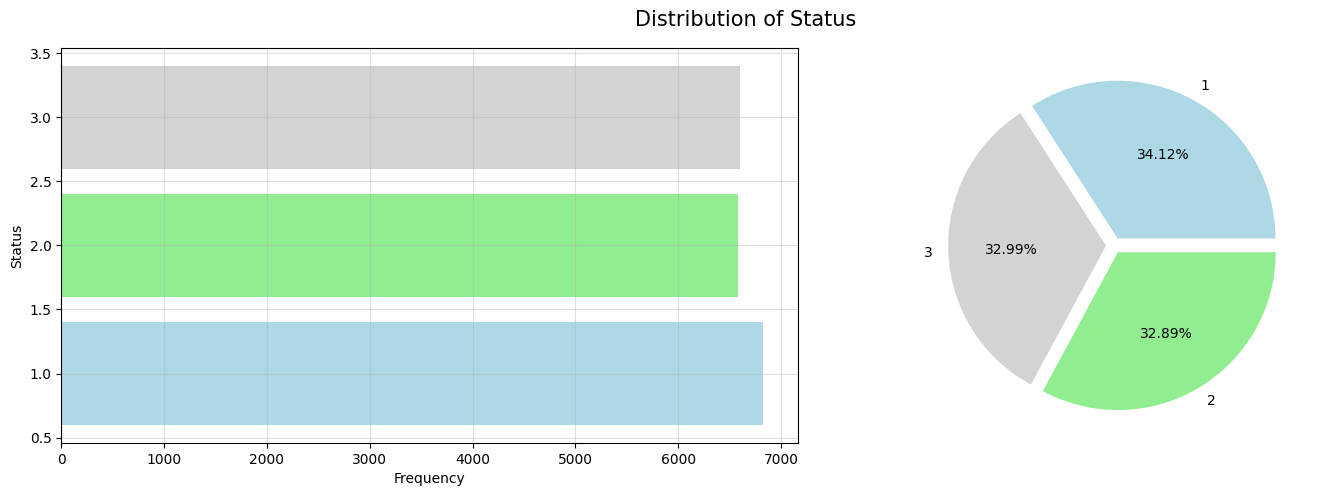

In [157]:
Cases = data['Stage'].value_counts()
colors = ['lightblue', 'lightgray',"lightgreen"]

# Create a two-subplot layout
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Bar chart on the first subplot
ax1.barh(y =Cases.index , width=Cases.values , color=colors)
ax1.set_xlabel('Frequency')
ax1.set_ylabel("Status")
ax1.grid(alpha=0.4)

# Pie chart on the second subplot
ax2.pie(Cases.values , labels=Cases.index , explode=([0.05] * len(Cases.index)), colors=colors, autopct='%.2f%%')

# Configure the overall layout
fig.suptitle('Distribution of Status', fontsize=15)
plt.tight_layout(pad=1)
plt.show



In [158]:
data.dtypes

N_Days                          int64
Status                         object
Drug                           object
Age                             int64
Sex                            object
Ascites                        object
Hepatomegaly                   object
Spiders                        object
Edema                          object
Bilirubin                     float64
Cholesterol                   float64
Albumin                       float64
Copper                        float64
Alk_Phos                      float64
SGOT                          float64
Tryglicerides                 float64
Platelets                     float64
Prothrombin                   float64
Stage                           int64
N_Days_MEDIAN_Difference      float64
N_Days_GREATER_THAN_MEDIAN      int64
dtype: object

In [159]:
data.describe()

N_Days           Age     Bilirubin   Cholesterol       Albumin  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean    1880.30300  18469.275550      3.490935    372.456173      3.483563   
std     1098.23497   3717.264426      4.812287    193.867122      0.371234   
min       41.00000   9598.000000      0.300000    120.000000      1.960000   
25%     1077.00000  15694.000000      0.800000    275.000000      3.310000   
50%     1666.00000  18460.000000      1.300000    369.510563      3.500000   
75%     2573.00000  20819.000000      3.500000    369.510563      3.750000   
max     4795.00000  28650.000000     28.000000   1775.000000      4.640000   

             Copper      Alk_Phos          SGOT  Tryglicerides     Platelets  \
count  20000.000000  20000.000000  20000.000000   20000.000000  20000.000000   
mean     101.226181   2022.670362    123.418525     123.948473    255.005373   
std       73.406398   1855.429599     47.590886      53.310888     99.113309   
min        4.000000    289.000000     26.350000      33.000000     62.000000   
25%       52.000000   1040.000000     92.000000      91.000000    185.000000   
50%       97.648387   1828.000000    122.556346     124.702128    251.000000   
75%      108.000000   1982.655769    136.400000     130.000000    309.000000   
max      588.000000  13862.400000    457.250000     598.000000    721.000000   

        Prothrombin         Stage  N_Days_MEDIAN_Difference  \
count  20000.000000  20000.000000               20000.00000   
mean      10.740409      1.988700                -214.30300   
std        0.891071      0.819149                1098.23497   
min        9.000000      1.000000               -3129.00000   
25%       10.000000      1.000000                -907.00000   
50%       10.600000      2.000000                   0.00000   
75%       11.200000      3.000000                 589.00000   
max       18.000000      3.000000                1625.00000   

       N_Days_GREATER_THAN_MEDIAN  
count                20000.000000  
mean                     0.497550  
std                      0.500006  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      1.000000  
max                      1.000000

**Handle Missing Values**

In [160]:
#cheking for missing values
data.isnull().sum()

N_Days                        0
Status                        0
Drug                          0
Age                           0
Sex                           0
Ascites                       0
Hepatomegaly                  0
Spiders                       0
Edema                         0
Bilirubin                     0
Cholesterol                   0
Albumin                       0
Copper                        0
Alk_Phos                      0
SGOT                          0
Tryglicerides                 0
Platelets                     0
Prothrombin                   0
Stage                         0
N_Days_MEDIAN_Difference      0
N_Days_GREATER_THAN_MEDIAN    0
dtype: int64

**Numerical Features Visualization**

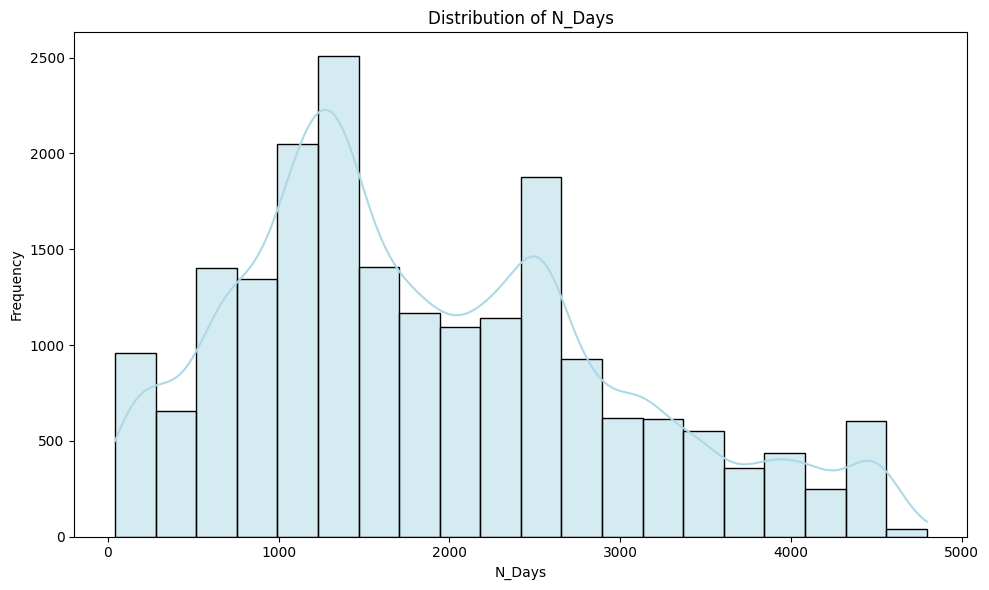

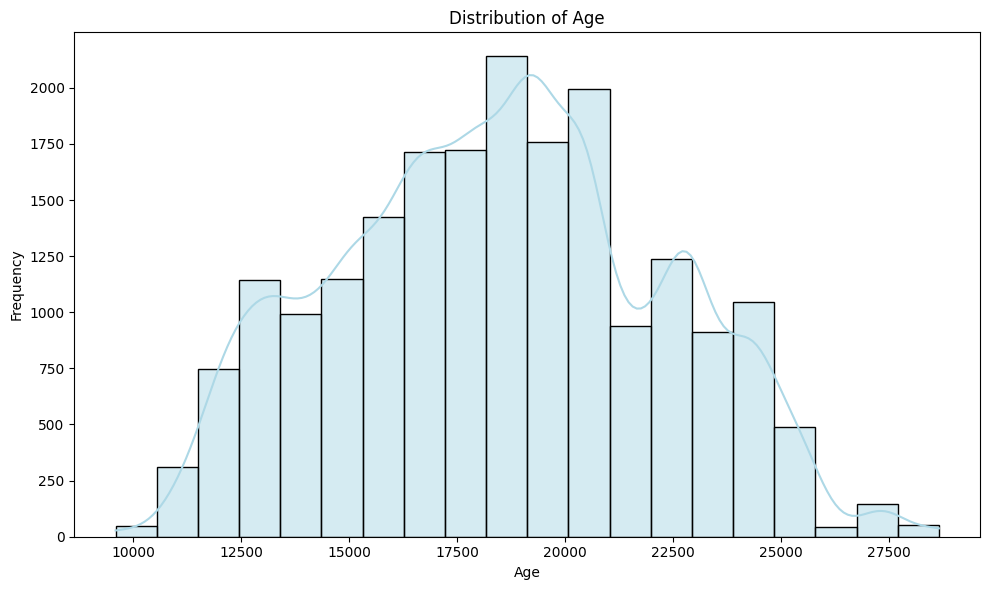

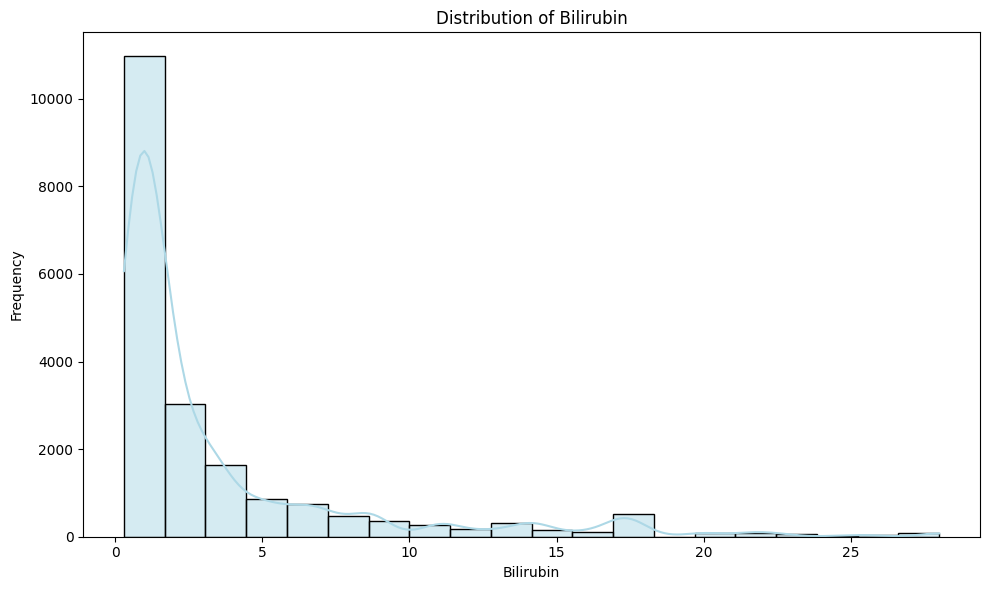

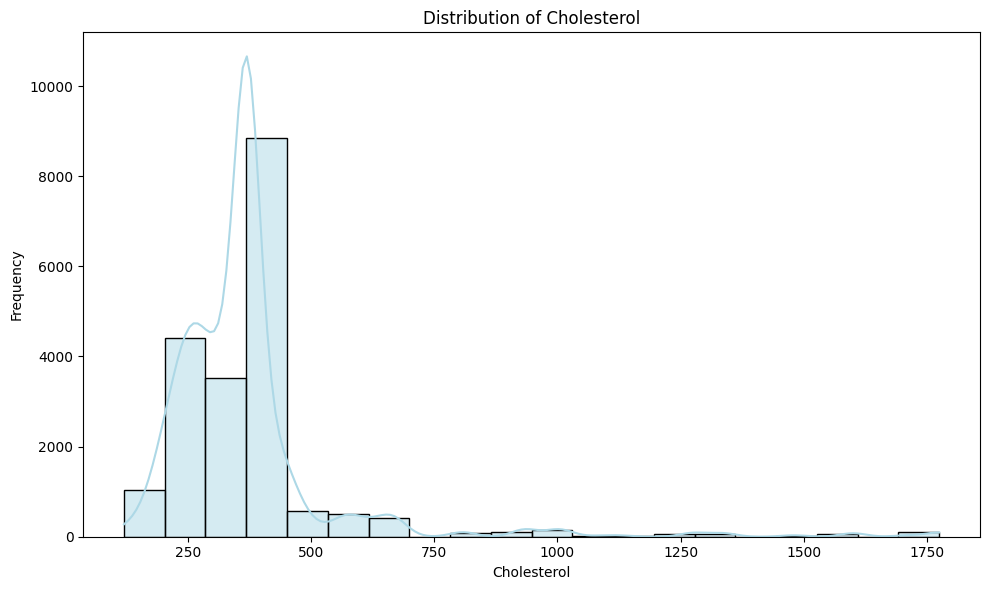

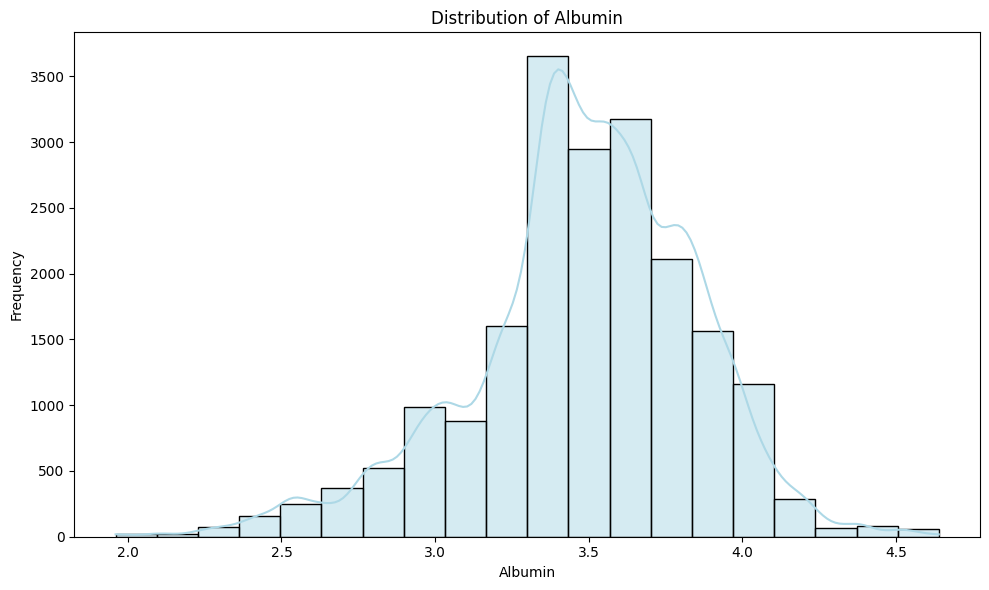

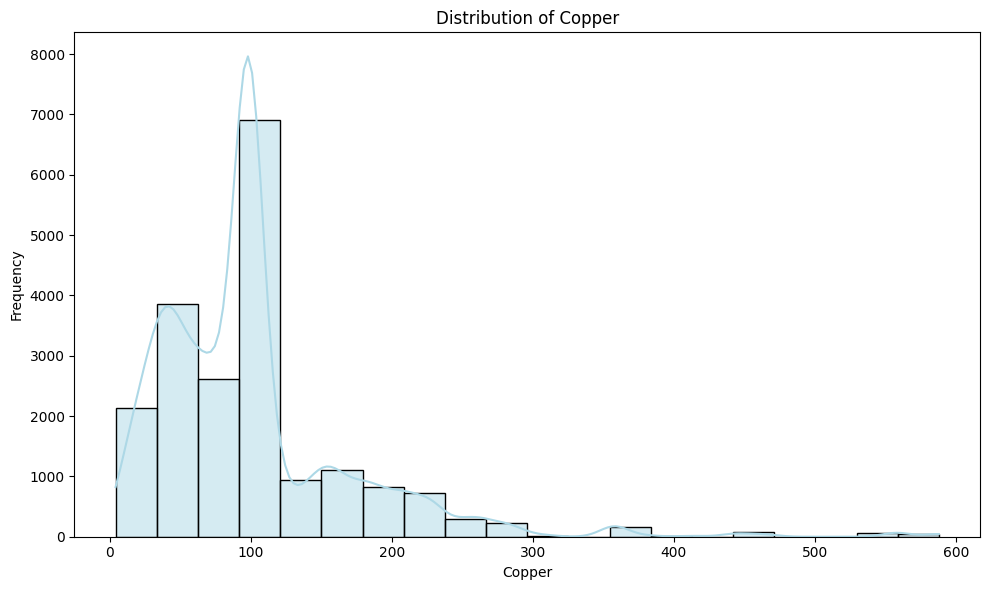

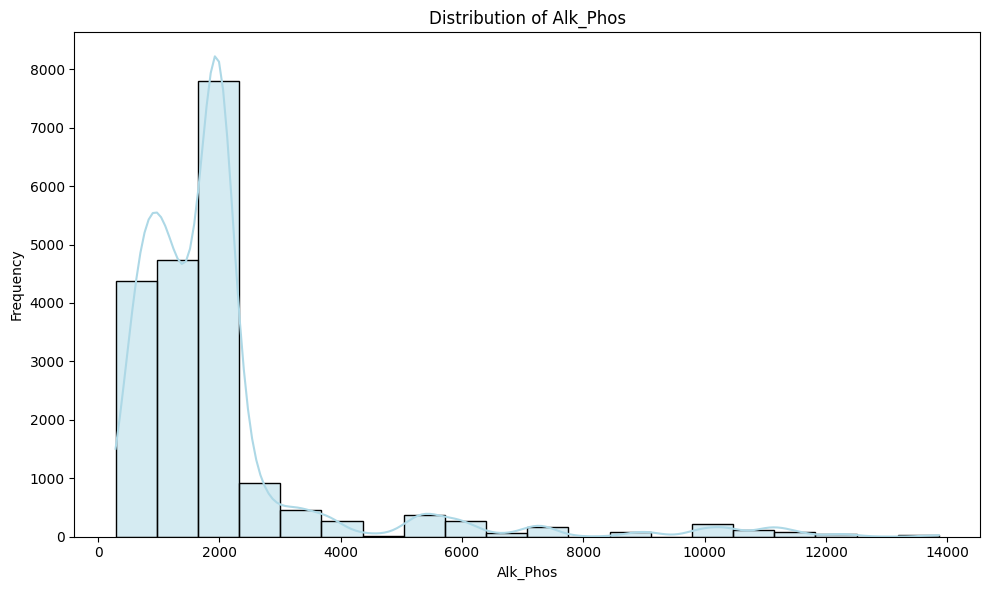

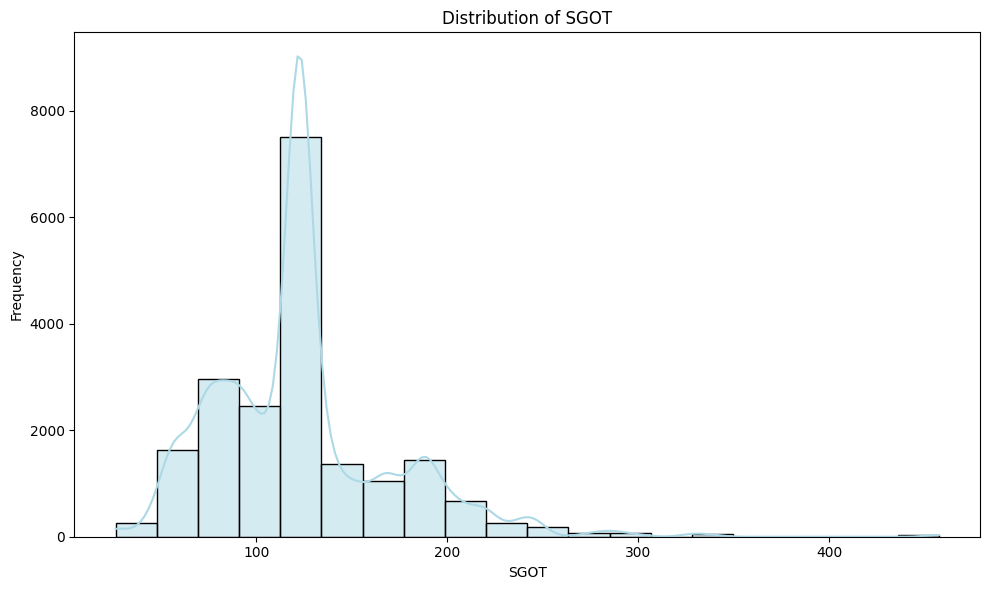

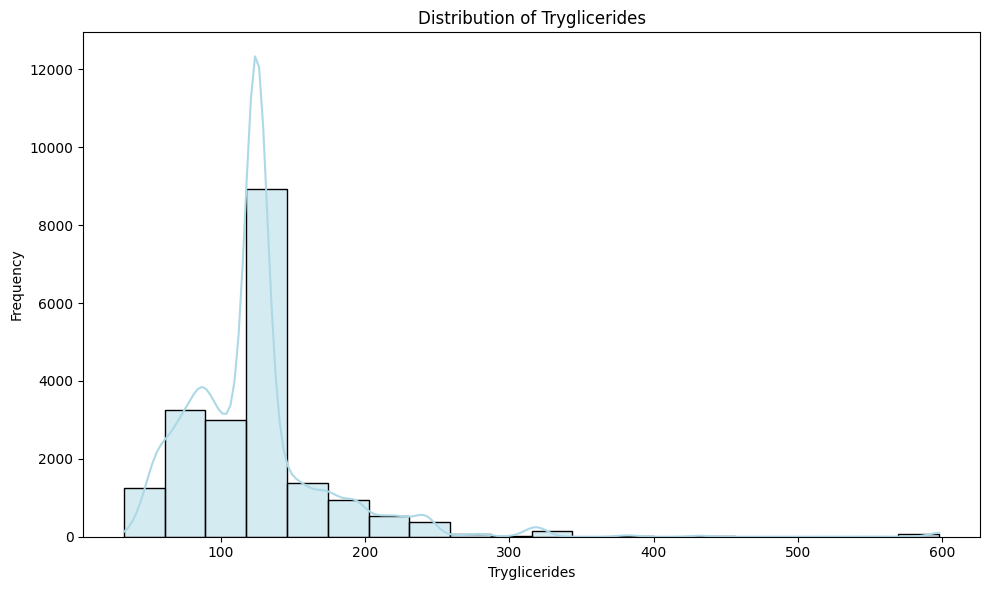

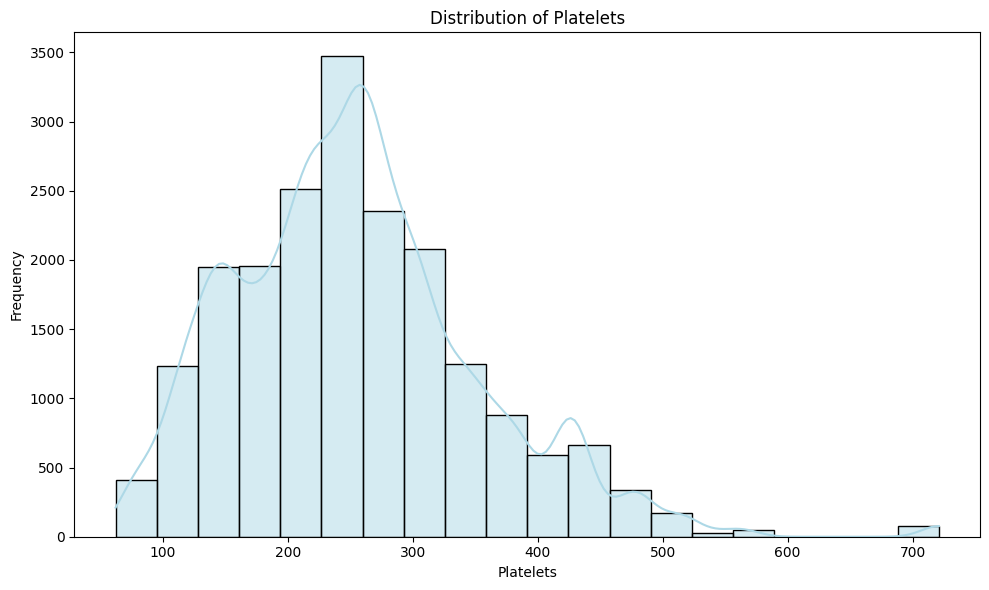

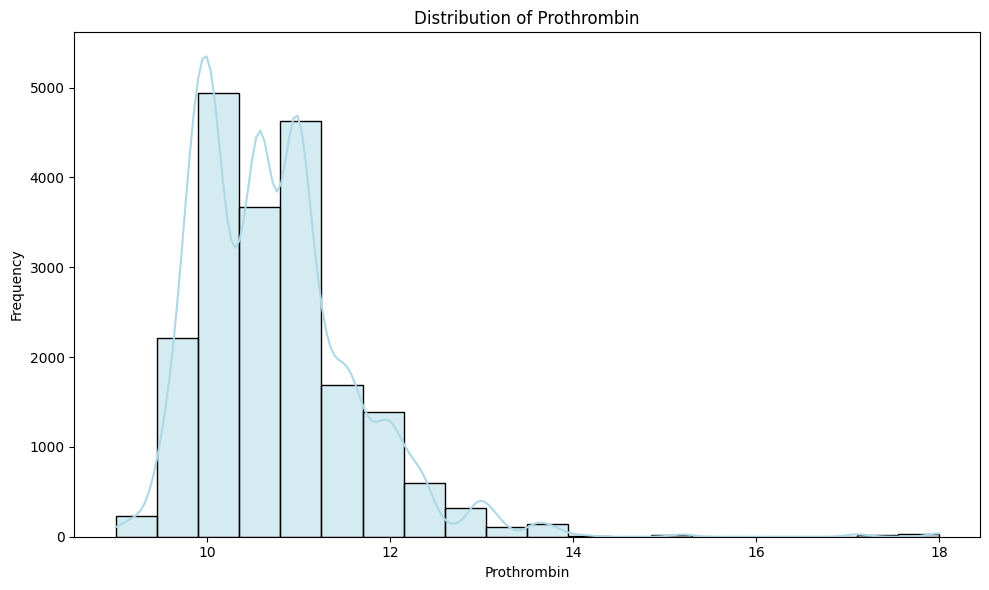

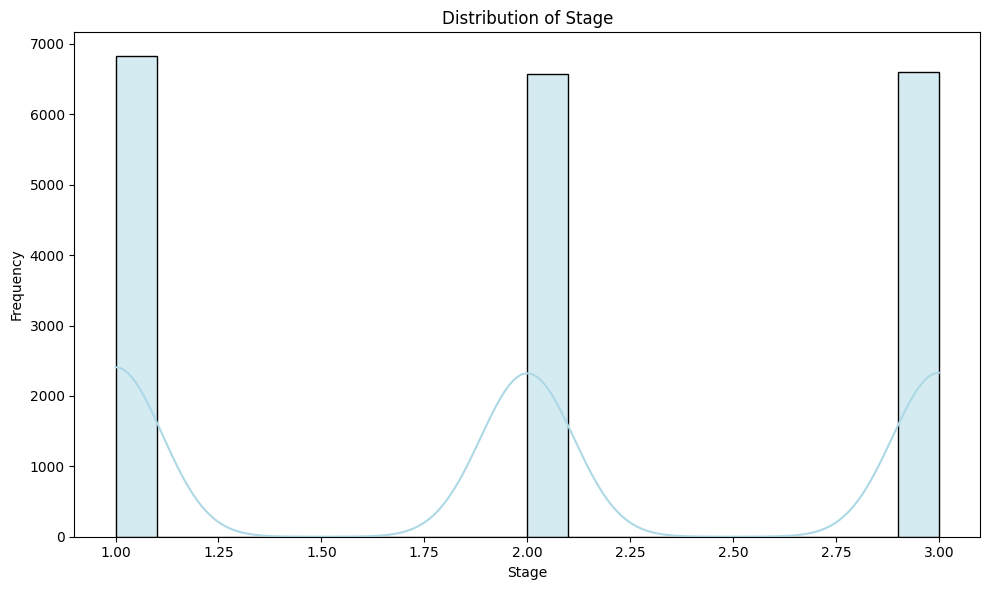

In [161]:
for column in numerical_list:

    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, bins=20, kde=True, color="lightblue")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
    plt.show()

## **categorical Features Visualization**

<ipython-input-162-89bde7575211>:13: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(x=column, data=data, ax=axes[i, 0], hue=column, palette=blues_palette, legend=False)
<ipython-input-162-89bde7575211>:13: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=column, data=data, ax=axes[i, 0], hue=column, palette=blues_palette, legend=False)
<ipython-input-162-89bde7575211>:13: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=column, data=data, ax=axes[i, 0], hue=column, palette=blues_palette, legend=False)
<ipython-input-162-89bde7575211>:13: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=column, data=data, ax=axes[i, 0], hue=column, palette=blues_palette, legend=False)
<ipython-input-162-89bde7575211>:13: UserWarning: The palette list has m

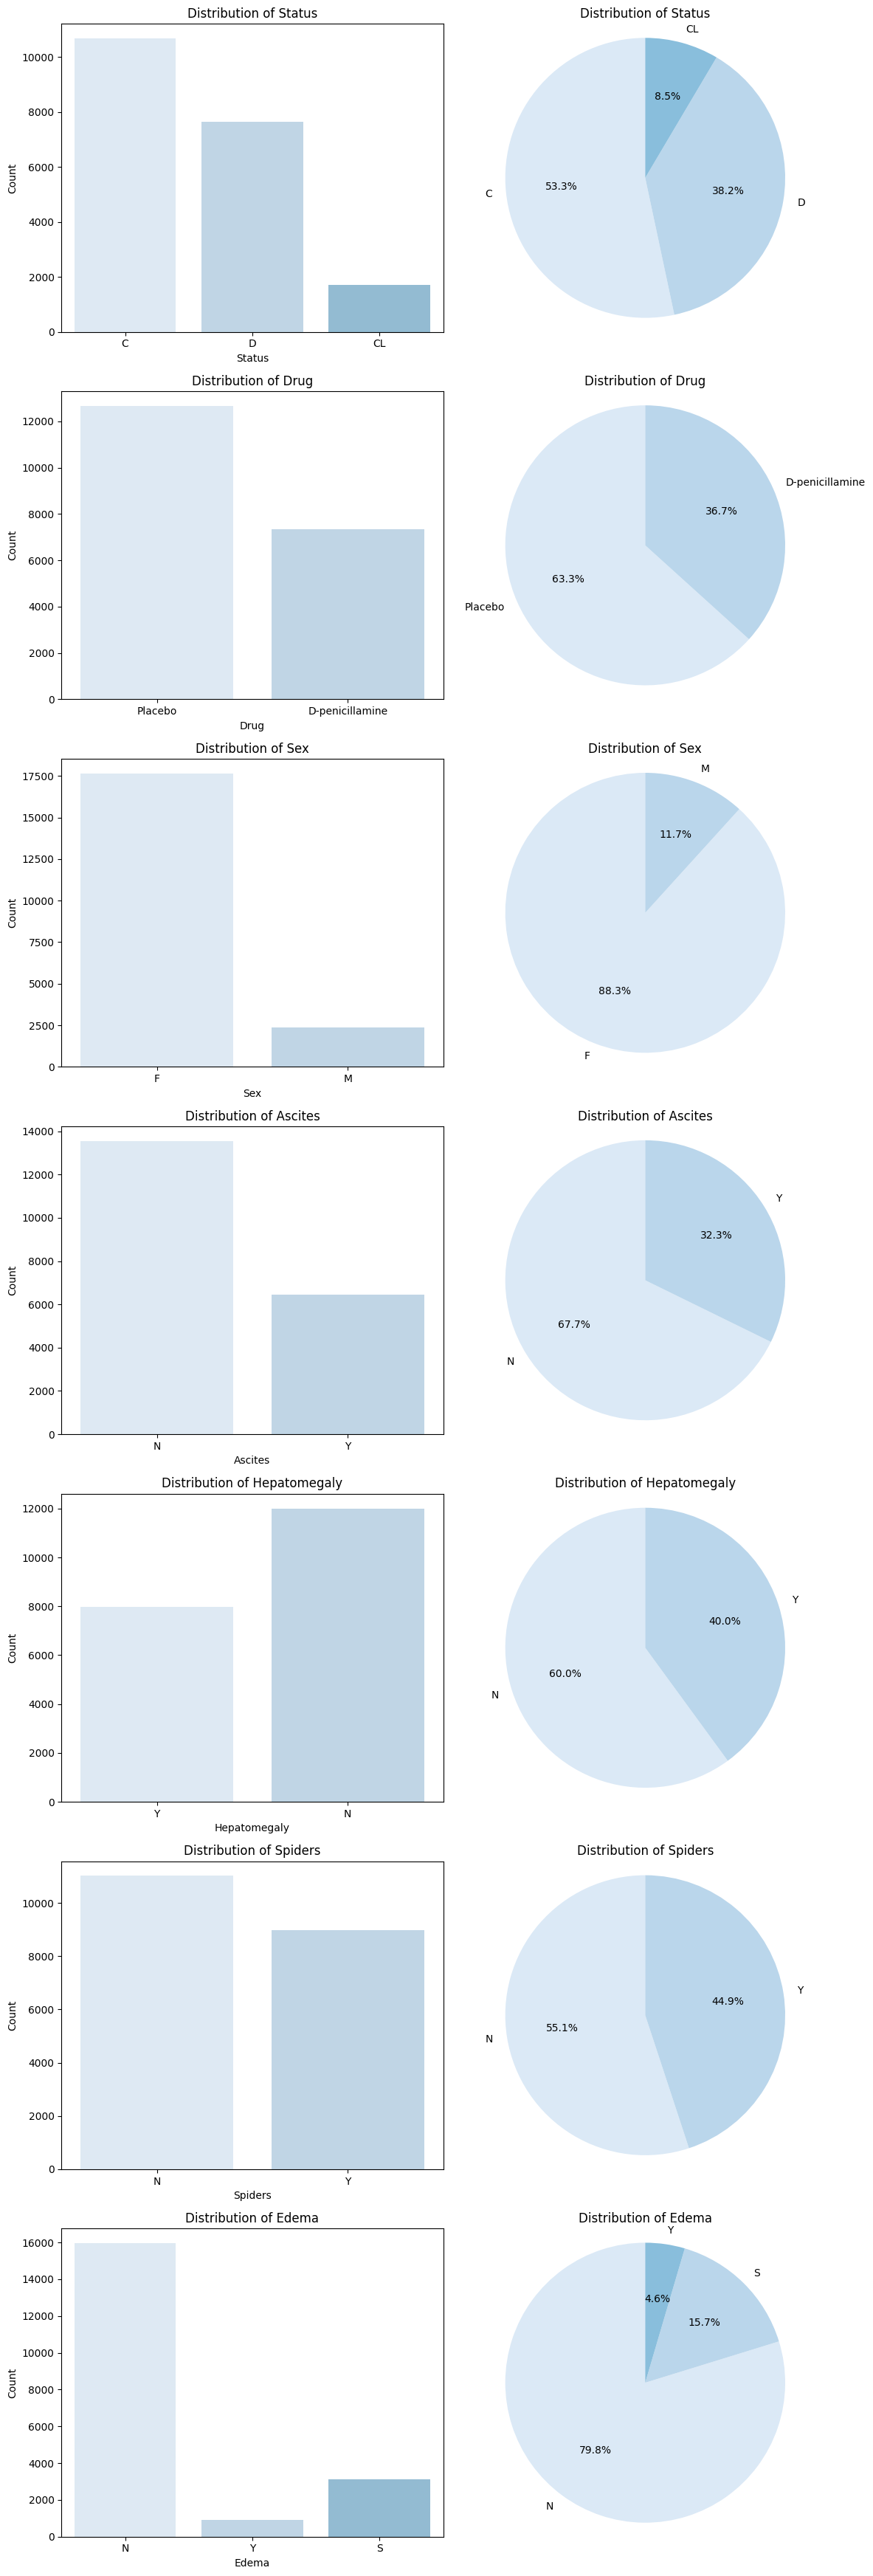

In [162]:
# Set the color palette
blues_palette = sns.color_palette("Blues")



nrows = len(categorical_list)
ncols = 2  # One column for bar plot, one for pie chart

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 5))

for i, column in enumerate(categorical_list):
    # Create bar plot
    sns.countplot(x=column, data=data, ax=axes[i, 0], hue=column, palette=blues_palette, legend=False)
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel("Count")
    axes[i, 0].set_title(f"Distribution of {column}")

    # Create pie chart (note the indentation for these lines)
    values = data[column].value_counts().sort_values(ascending=False)
    axes[i, 1].pie(values, labels=values.index, autopct="%1.1f%%", startangle=90, colors=blues_palette[:len(values)])
    axes[i, 1].set_title(f"Distribution of {column}")
    axes[i, 1].axis("equal")

plt.tight_layout()
plt.show()


# **Distribution of features vs. Target**

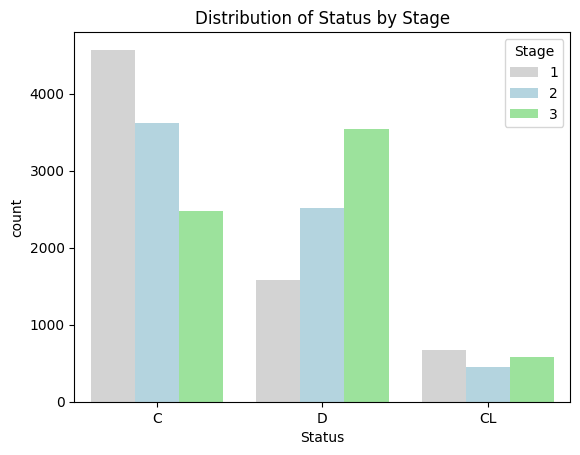

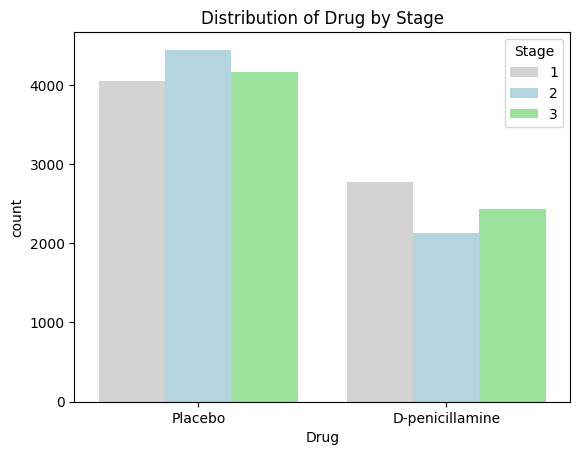

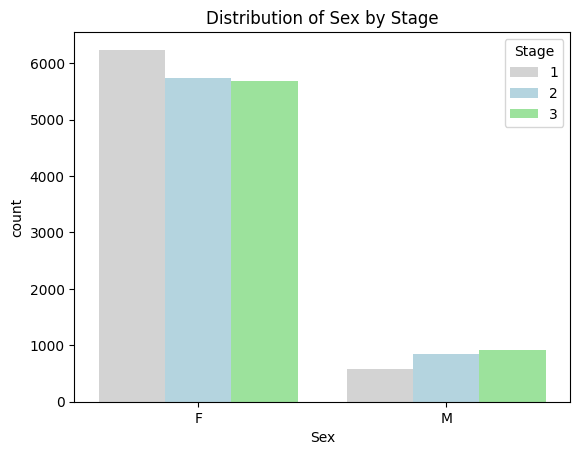

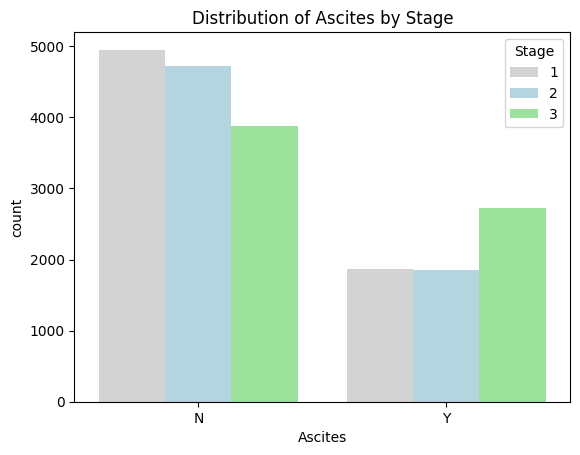

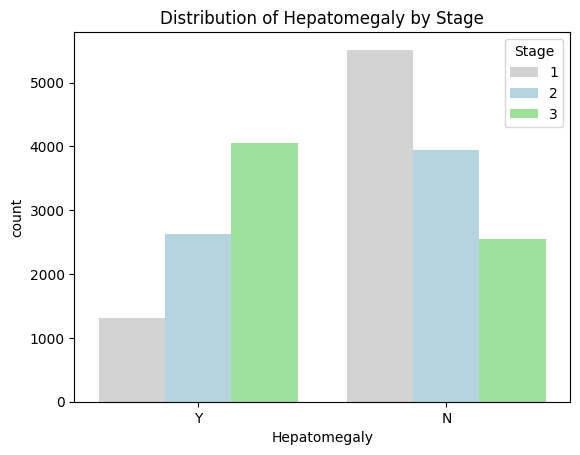

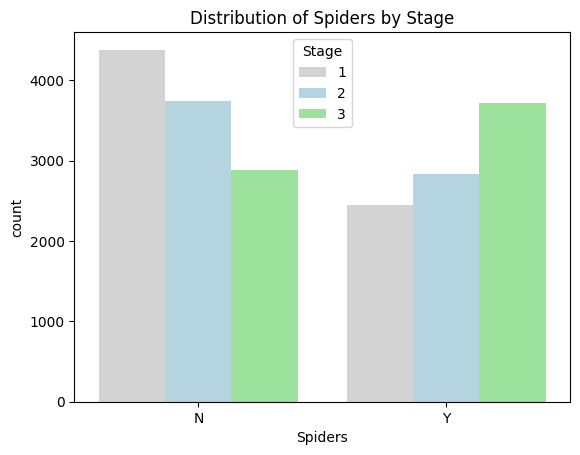

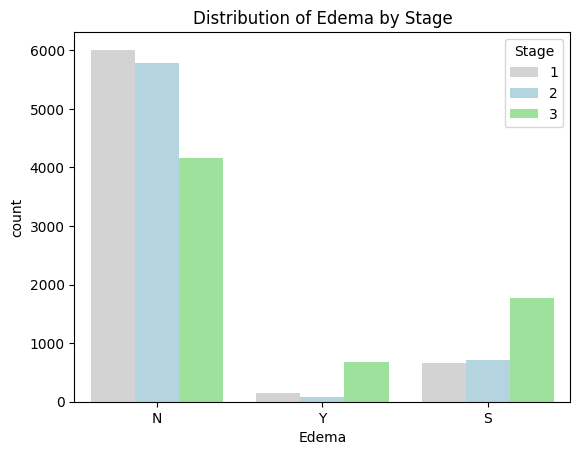

In [163]:
 for col in categorical_list:
    # Create a palette with lightblue and pink
    palette = sns.color_palette(['lightgray','lightblue',"lightgreen"])

    # Create the count plot
    sns.countplot(x=col, hue='Stage', data=data, palette=palette)

    # Set the title
    plt.title(f"Distribution of {col} by Stage")
    plt.show()

# **Univariate Analysis**
- Analyze each variable individually to understand their distributions.

1. Numerical Variables
- we have to Use histograms and box plots to visualize the distributions

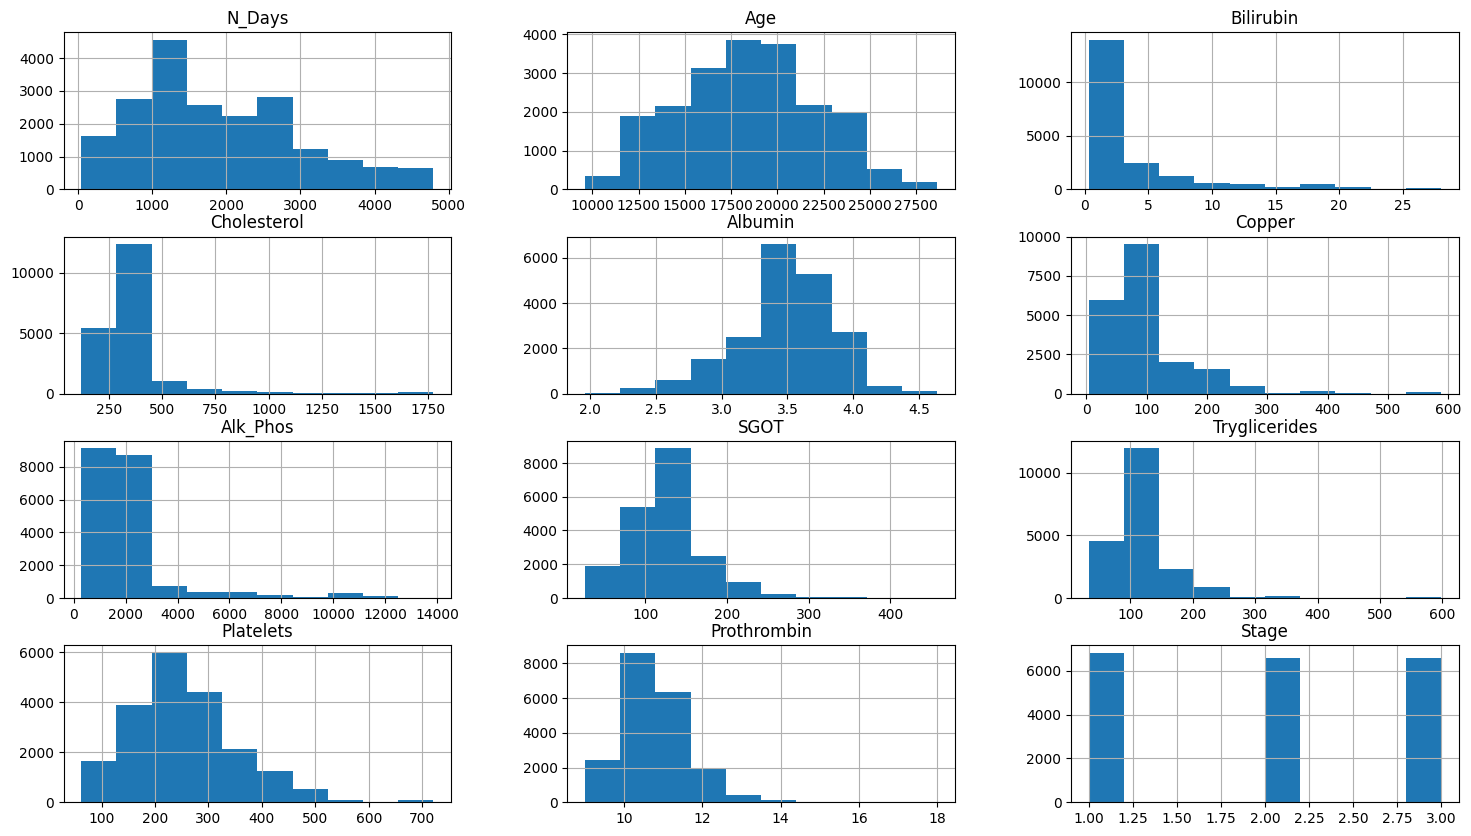

In [164]:
# histograms
data[numerical_list].hist(figsize=(18, 10))
#sns.histplot(data[numerical_list] ,bins=50, kde=True)
plt.show()



If the histogram has a long tail on the right, it indicates a positive skew.When most of data shows a right-skewed distribution (positive skew), it indicates Mean > Median,Outliers,the data can extend indefinitely in the positive direction.

<ipython-input-165-58d8852c955f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], ax=axes[i], palette='Set2')
<ipython-input-165-58d8852c955f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], ax=axes[i], palette='Set2')
<ipython-input-165-58d8852c955f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], ax=axes[i], palette='Set2')
<ipython-input-165-58d8852c955f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and 

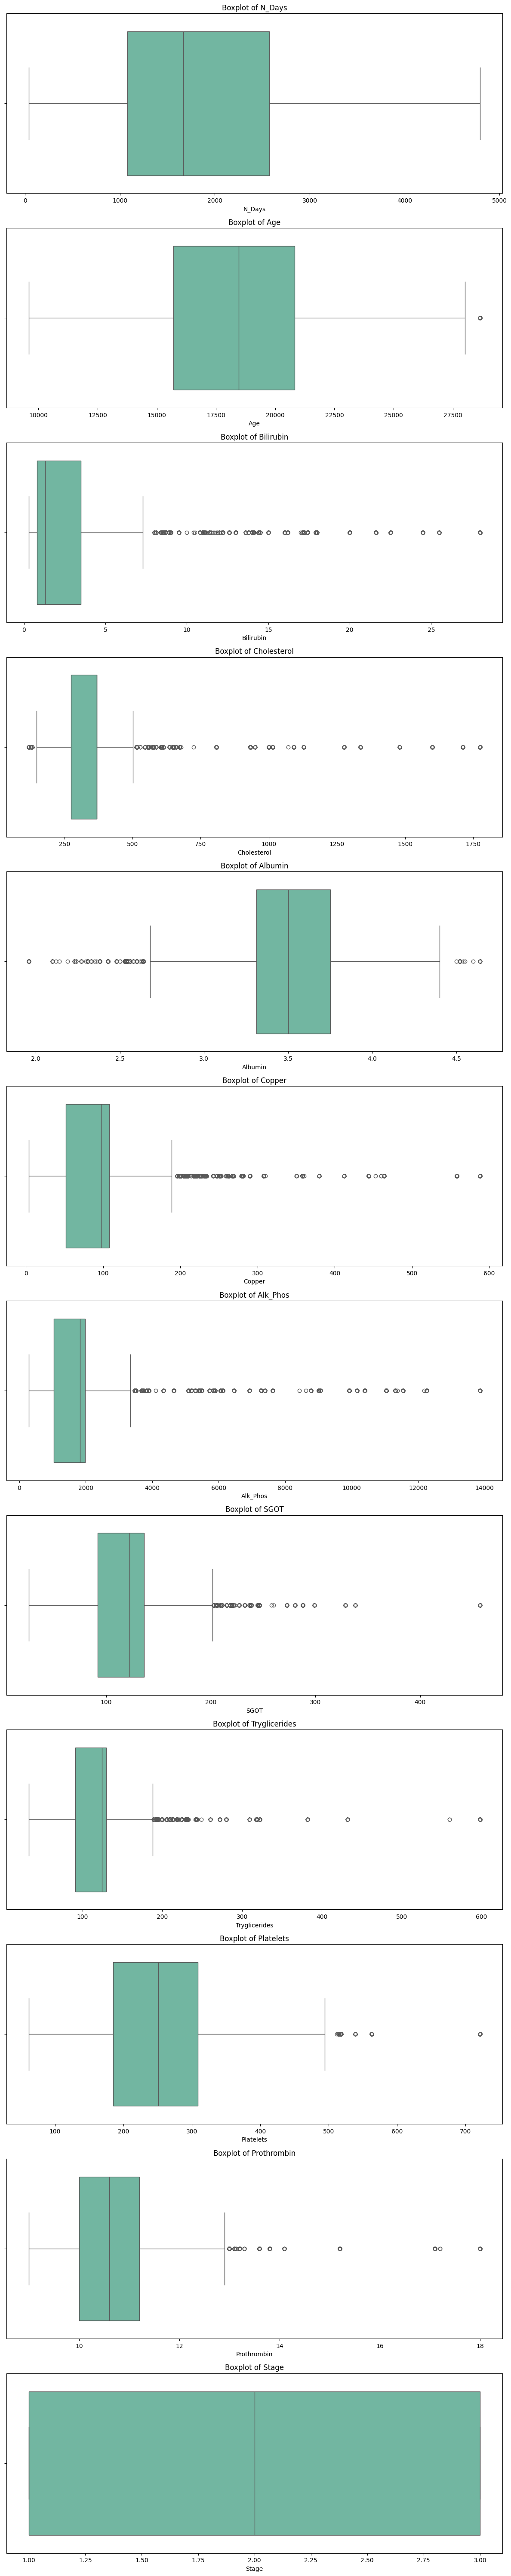

In [165]:
fig, axes = plt.subplots(len(numerical_list), 1, figsize=(12, 5*len(numerical_list)))

# Plot boxplot for each numerical column
for i, col in enumerate(data[numerical_list].columns):
    sns.boxplot(x=data[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [166]:
categorical_list

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# **Bivariate Analysis**

<Figure size 1600x1600 with 0 Axes>

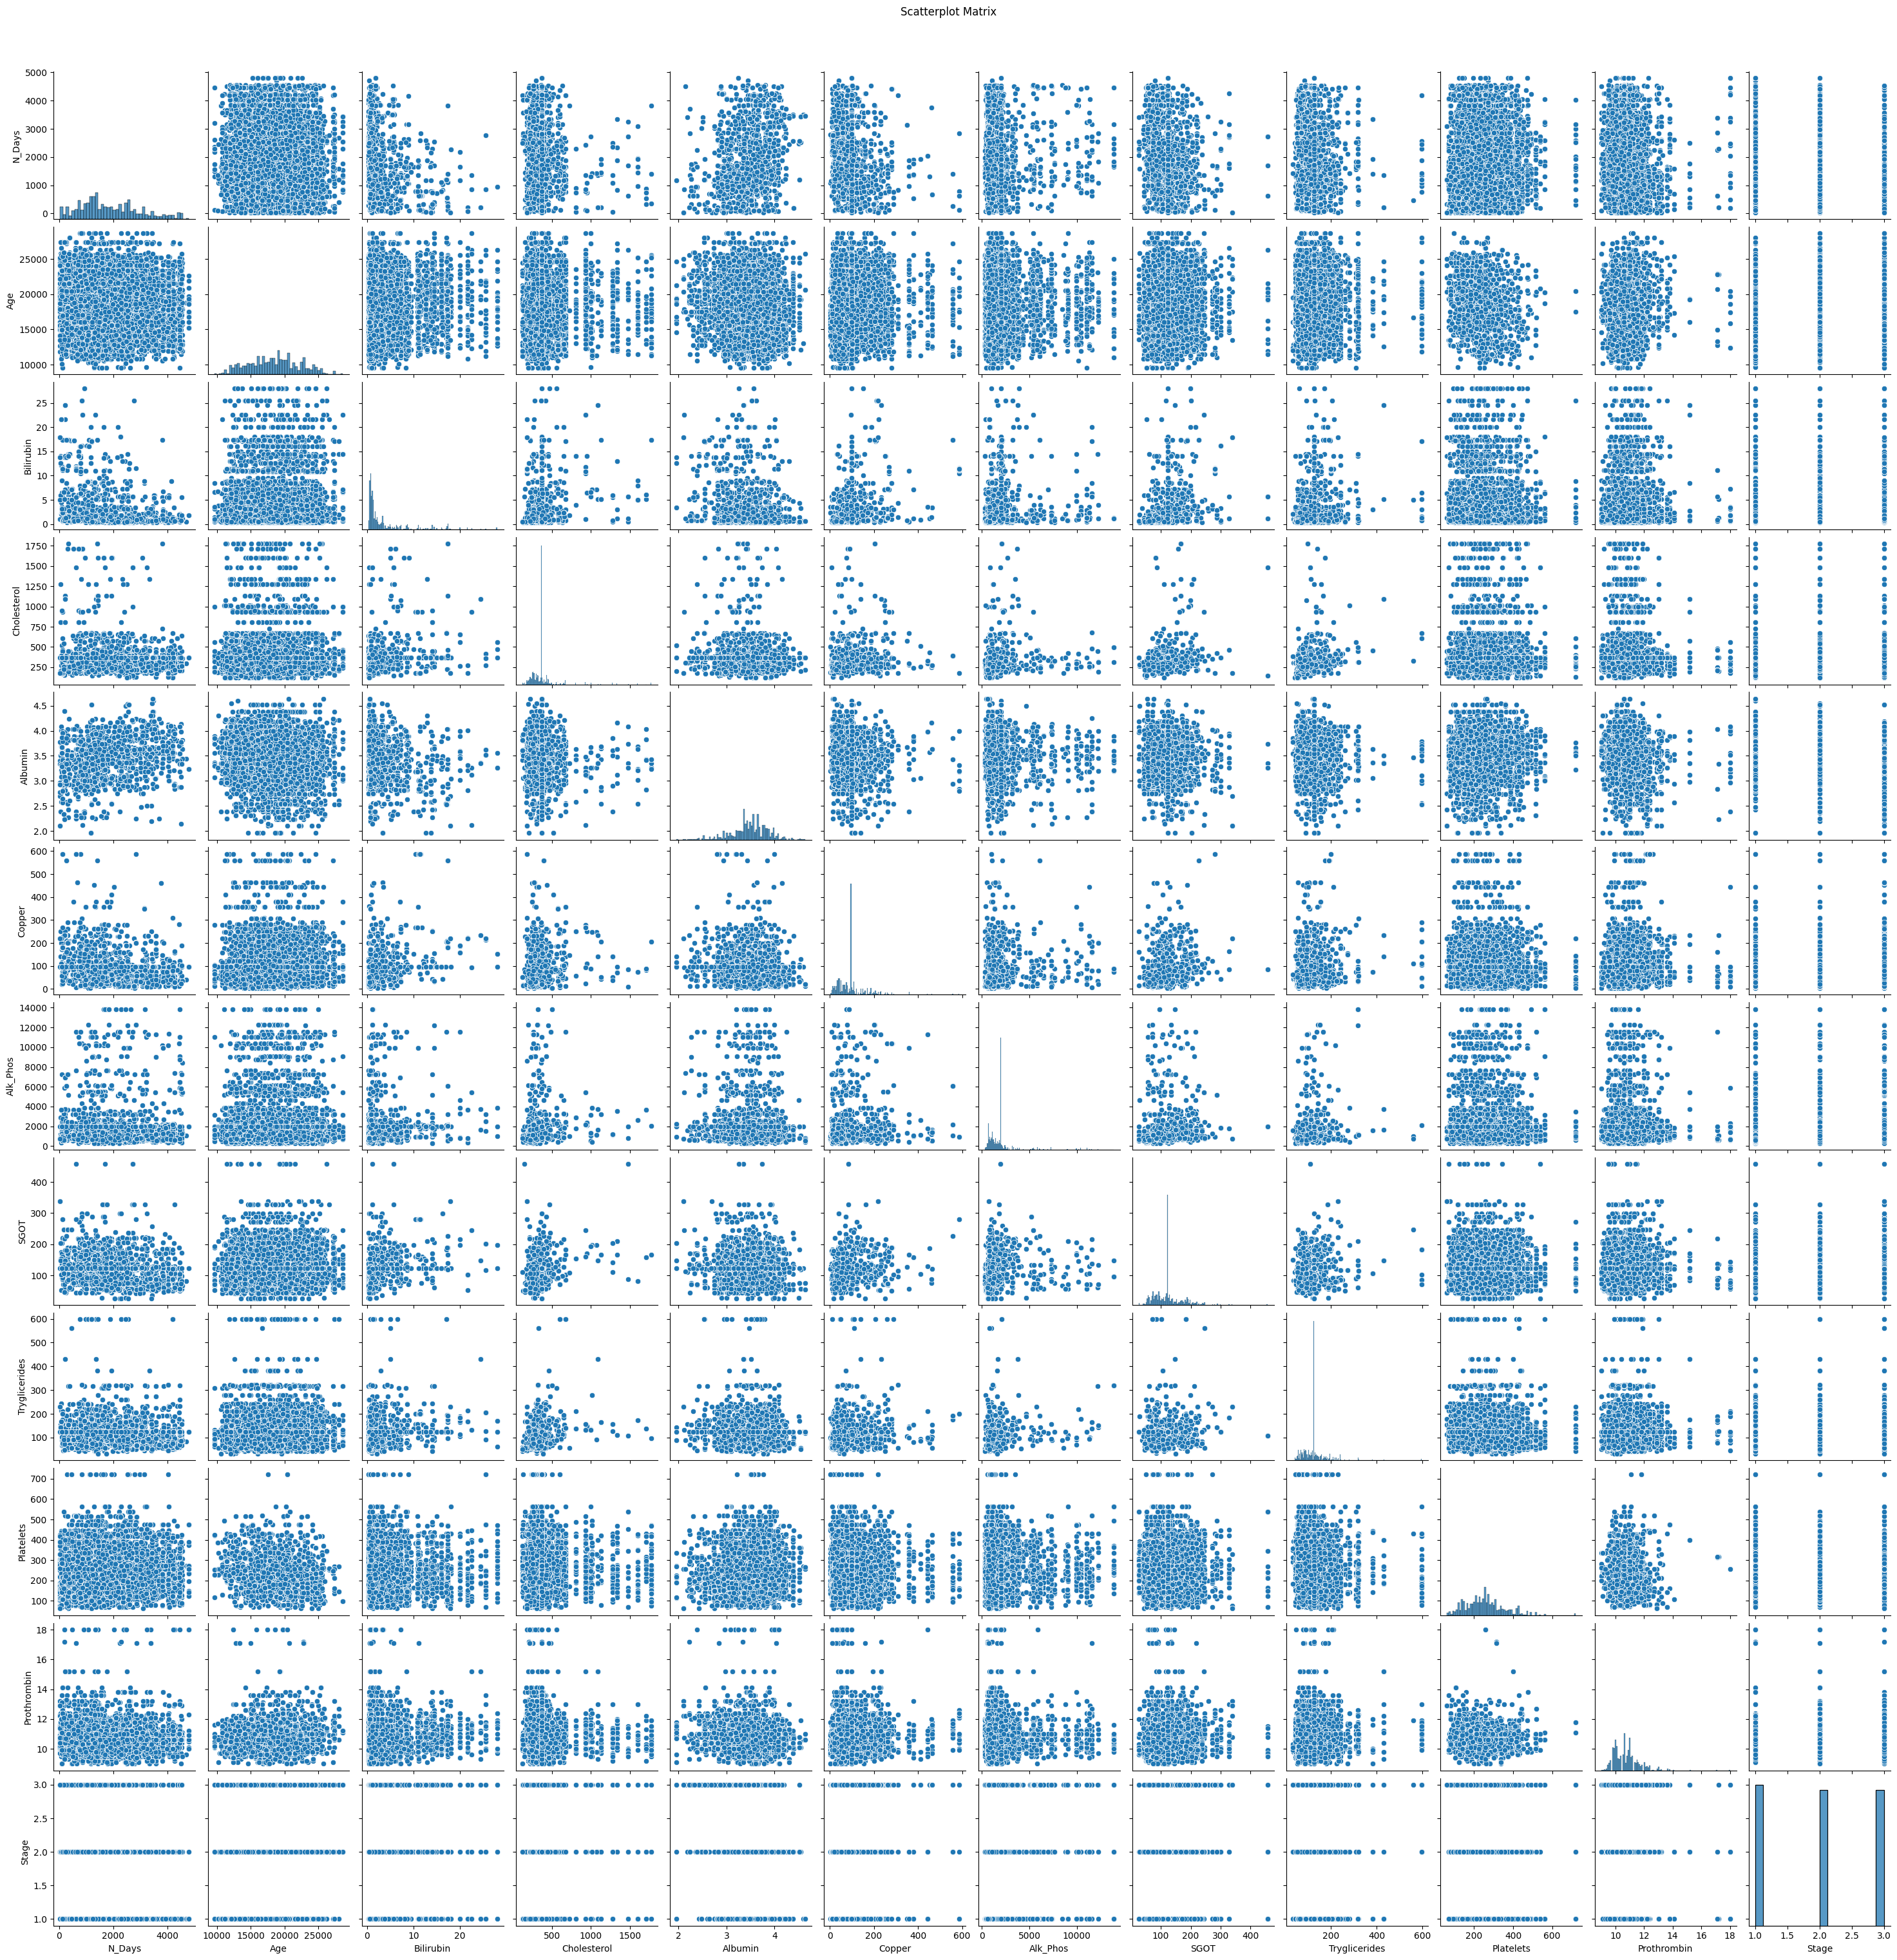

In [167]:
plt.figure(figsize=(16, 16))
# Create the pairplot
sns.pairplot(data[numerical_list])
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

In [168]:
# Correlation matrix
correlation_matrix = data[numerical_list].corr()
correlation_matrix

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
N_Days         1.000000 -0.061657  -0.398275    -0.125854  0.362456 -0.273507   
Age           -0.061657  1.000000   0.013256    -0.014041 -0.097489  0.003912   
Bilirubin     -0.398275  0.013256   1.000000     0.338206 -0.289378  0.435768   
Cholesterol   -0.125854 -0.014041   0.338206     1.000000 -0.065738  0.130683   
Albumin        0.362456 -0.097489  -0.289378    -0.065738  1.000000 -0.173418   
Copper        -0.273507  0.003912   0.435768     0.130683 -0.173418  1.000000   
Alk_Phos       0.161766  0.041253   0.107013     0.108687 -0.129746  0.203953   
SGOT          -0.218885  0.055855   0.364657     0.308402 -0.161090  0.271286   
Tryglicerides -0.153157  0.034528   0.374857     0.238484 -0.110775  0.251327   
Platelets      0.117011 -0.114233  -0.112039    -0.014705  0.117747 -0.078734   
Prothrombin   -0.157411  0.030793   0.247120     0.016965 -0.237876  0.133237   
Stage         -0.293785  0.163227   0.161666     0.030097 -0.225017  0.114542   

               Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin  \
N_Days         0.161766 -0.218885      -0.153157   0.117011    -0.157411   
Age            0.041253  0.055855       0.034528  -0.114233     0.030793   
Bilirubin      0.107013  0.364657       0.374857  -0.112039     0.247120   
Cholesterol    0.108687  0.308402       0.238484  -0.014705     0.016965   
Albumin       -0.129746 -0.161090      -0.110775   0.117747    -0.237876   
Copper         0.203953  0.271286       0.251327  -0.078734     0.133237   
Alk_Phos       1.000000  0.150527       0.126312  -0.007046     0.083017   
SGOT           0.150527  1.000000       0.122340  -0.098648     0.153038   
Tryglicerides  0.126312  0.122340       1.000000  -0.031847     0.024260   
Platelets     -0.007046 -0.098648      -0.031847   1.000000    -0.161411   
Prothrombin    0.083017  0.153038       0.024260  -0.161411     1.000000   
Stage          0.089791  0.183873       0.073853  -0.255488     0.300108   

                  Stage  
N_Days        -0.293785  
Age            0.163227  
Bilirubin      0.161666  
Cholesterol    0.030097  
Albumin       -0.225017  
Copper         0.114542  
Alk_Phos       0.089791  
SGOT           0.183873  
Tryglicerides  0.073853  
Platelets     -0.255488  
Prothrombin    0.300108  
Stage          1.000000

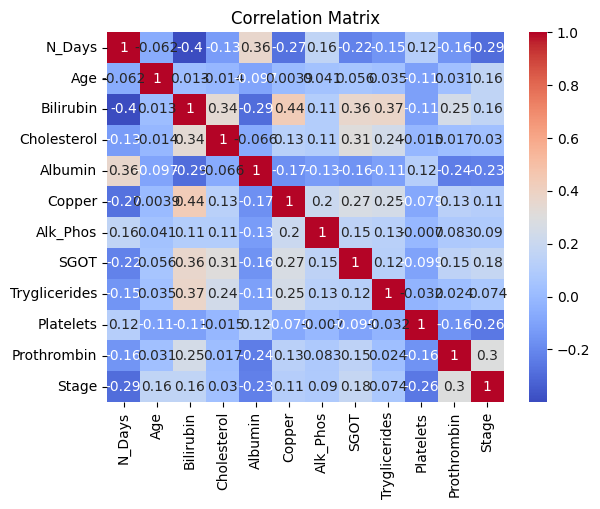

In [169]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Outliers**

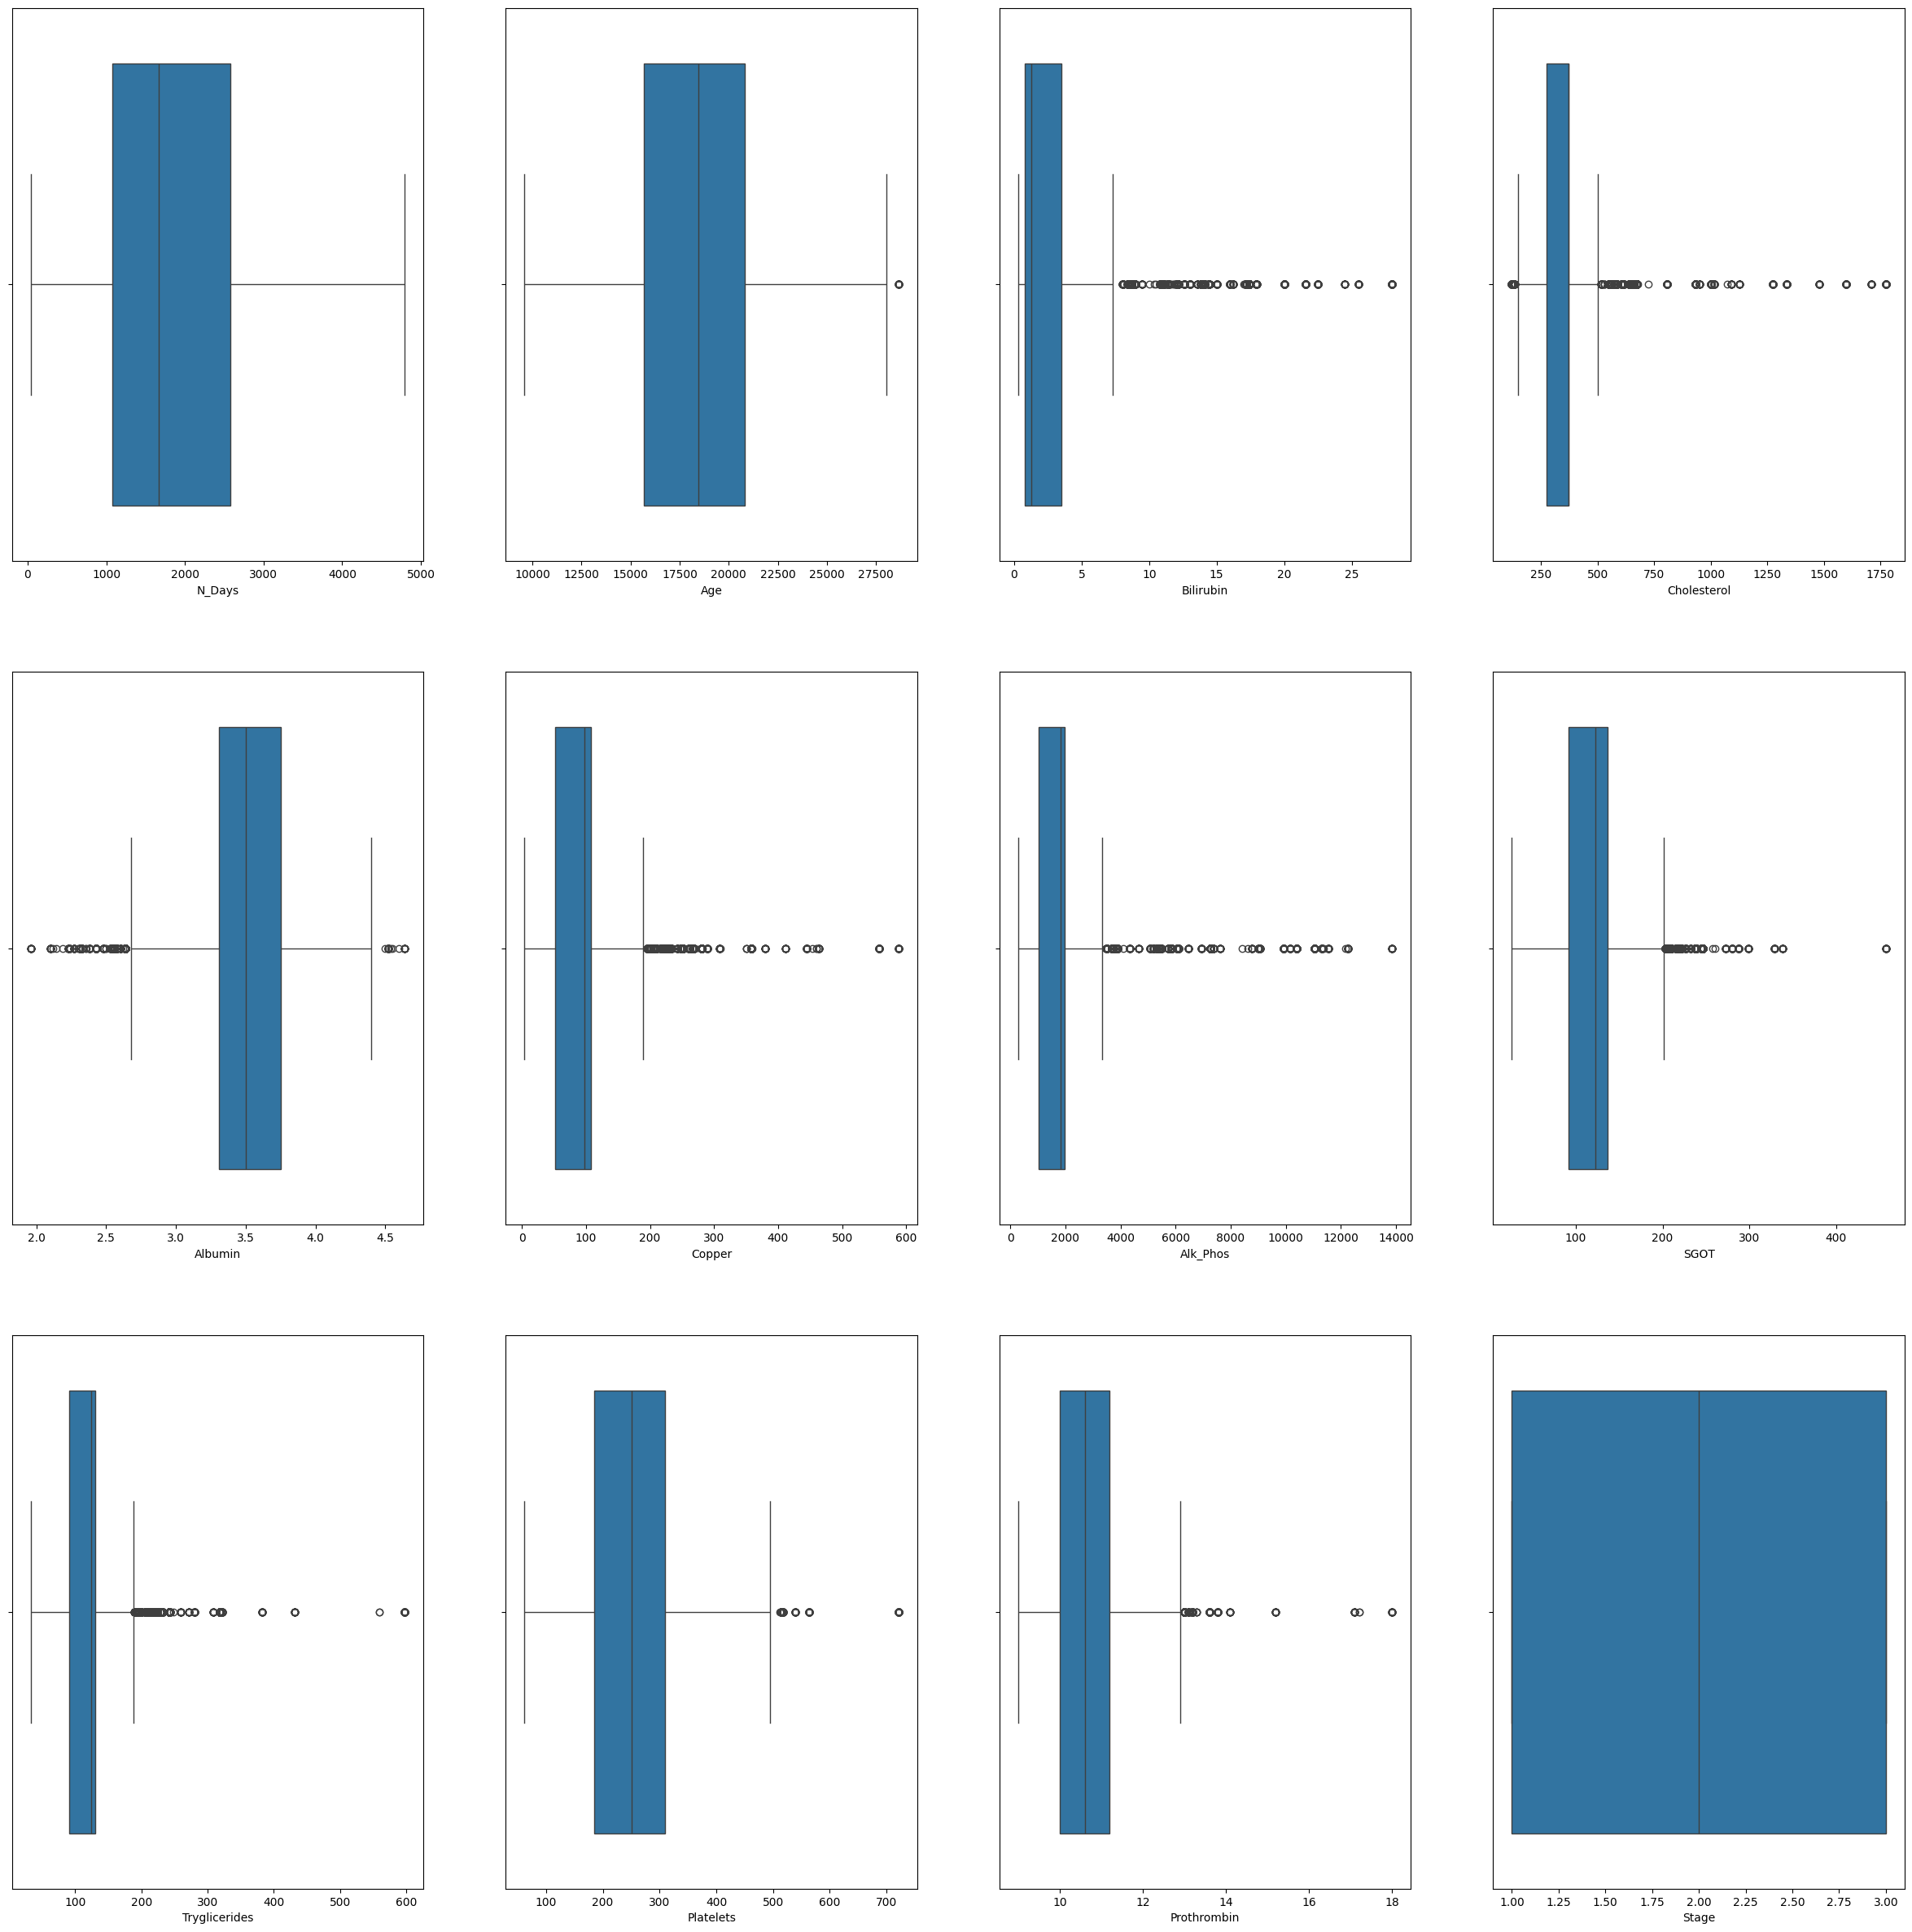

In [170]:
import matplotlib.pyplot as plt

# Create the plot grid
rows = 3
columns = 4

fig, axes = plt.subplots(rows, columns, figsize=(30, 30))

x, y = 0, 0

for i, column in enumerate(numerical_list):
    sns.boxplot(x=data[column], ax=axes[x, y])

    if y < columns - 1:
        y += 1
    elif y == columns - 1:
        x += 1
        y = 0
    else:
        y += 1

plt.show()

In [171]:
# Define the IQR technique function
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Assuming 'Value' is the column we want to analyze for outliers
column_name = 'Stage'  # Replace with the actual column name want to analyze

# Calculate the lower and upper range for the specified column
lower_range, upper_range = iqr_technique(data[column_name])

# Remove outliers from the dataframe
data_cleaned = data[(data[column_name] > lower_range) & (data[column_name] < upper_range)]





In [172]:
# Print the shape of the cleaned dataframe
data_cleaned.shape

(20000, 21)

In [173]:
numerical_list

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [174]:
# Define the IQR technique function
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Assuming 'Value' is the column we want to analyze for outliers
column_name = ['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']  # Replace with the actual column name want to analyze

# Calculate the lower and upper range for the specified column
lower_range, upper_range = iqr_technique(data[column_name])

# Remove outliers from the dataframe
data_cleaned = data[(data[column_name] > lower_range) & (data[column_name] < upper_range)]


In [175]:
# extract numeric features :
numeric = data.select_dtypes(include=["number"])
numeric.head()

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0    2221  18499        0.5        149.0     4.04   227.0     598.0   52.70   
1    1230  19724        0.5        219.0     3.93    22.0     663.0   45.00   
2    4184  11839        0.5        320.0     3.54    51.0    1243.0  122.45   
3    2090  16467        0.7        255.0     3.74    23.0    1024.0   77.50   
4    2105  21699        1.9        486.0     3.54    74.0    1052.0  108.50   

   Tryglicerides  Platelets  Prothrombin  Stage  N_Days_MEDIAN_Difference  \
0           57.0      256.0          9.9      1                    -555.0   
1           75.0      220.0         10.8      2                     436.0   
2           80.0      225.0         10.0      2                   -2518.0   
3           58.0      151.0         10.2      2                    -424.0   
4          109.0      151.0         11.5      1                    -439.0   

   N_Days_GREATER_THAN_MEDIAN  
0                           1  
1                           0  
2                           1  
3                           1  
4                           1

 Outlier Detection and Removal using the IQR Method

ValueError: num must be an integer with 1 <= num <= 24, not 25

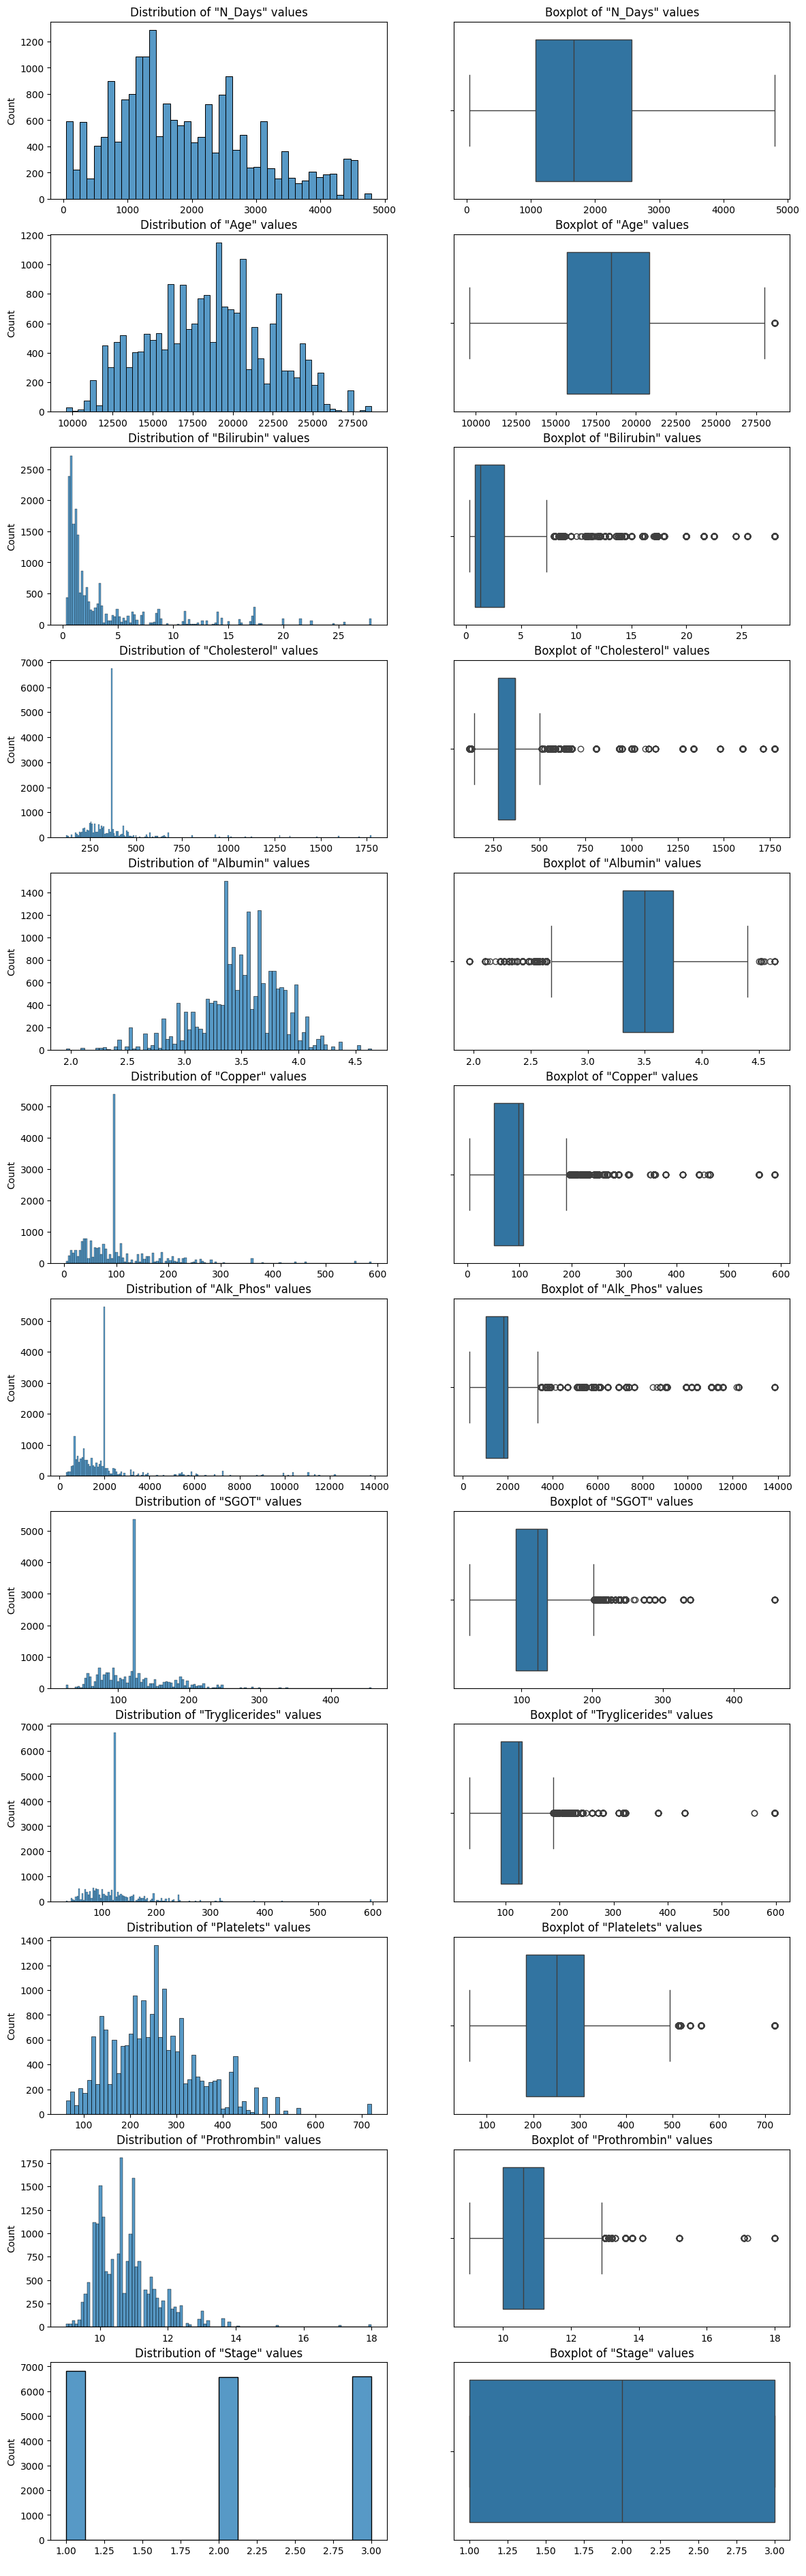

In [176]:
# visualizing numeric features and explore outliers :-

j = 1
z = 2

plt.figure(figsize=(14,48));

for i in numeric.columns:
    plt.subplot(12,2,j);
    sns.histplot(x = numeric[i]);
    plt.title('Distribution of "'+i+'" values')
    plt.xlabel(" ");
    j+=2

    plt.subplot(12,2,z);
    sns.boxplot(x = numeric[i]);
    plt.title('Boxplot of "'+i+'" values')
    plt.xlabel(" ");
    z+=2

In [178]:
# creating datafram showing number of outliers in each feature :

def df_outliers(data):

    outliers = {'feature' : [],
               'num_outliers' : [],
               'percentage' : []}

    for col in data.columns:
        # calculate interquartile range IQR :
        IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

        # determine the thresholds of the values :
        upper_threshold = data[col].quantile(0.75) + (IQR*1.5)
        lower_threshold = data[col].quantile(0.25) - (IQR*1.5)

        # number of outliers :
        upper_outliers = data[data[col] > upper_threshold].shape[0]
        lower_outliers = data[data[col] < lower_threshold].shape[0]
        total_outliers = upper_outliers + lower_outliers

        # create a table showing number of outliers in each column :
        outliers['feature'].append(col)
        outliers['num_outliers'].append(total_outliers)
        outliers['percentage'].append(round(total_outliers/data.shape[0] *100 ,2))

    # return table as dataframe :
    outliers = pd.DataFrame(outliers)
    return outliers

In [179]:
df_outliers(numeric)

feature  num_outliers  percentage
0                       N_Days             0        0.00
1                          Age            39        0.19
2                    Bilirubin          2563       12.81
3                  Cholesterol          1783        8.91
4                      Albumin           736        3.68
5                       Copper          1947        9.74
6                     Alk_Phos          1824        9.12
7                         SGOT          1299        6.49
8                Tryglicerides          1730        8.65
9                    Platelets           298        1.49
10                 Prothrombin           486        2.43
11                       Stage             0        0.00
12    N_Days_MEDIAN_Difference             0        0.00
13  N_Days_GREATER_THAN_MEDIAN             0        0.00

In [180]:


# Function to remove outliers from a column using IQR method
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column[(column >= Q1 - 1.5 * IQR) & (column <= Q3 + 1.5 * IQR)]

# Dictionary to store information about removed outliers
removed_outliers_info = {}

# Iterate over each numerical column
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    # Count rows before outlier removal
    rows_before = len(data)

    # Remove outliers from the column
    data[column] = remove_outliers(data[column])

    # Count rows after outlier removal
    rows_after = len(data)

    # Calculate number of outliers removed
    outliers_removed = rows_before - rows_after

    # Store information about removed outliers
    removed_outliers_info[column] = outliers_removed

# Display information about removed outliers
print("Outliers Removed:")
for column, removed_count in removed_outliers_info.items():
    print(f"{column}: {removed_count}")

Outliers Removed:
N_Days: 0
Age: 0
Bilirubin: 0
Cholesterol: 0
Albumin: 0
Copper: 0
Alk_Phos: 0
SGOT: 0
Tryglicerides: 0
Platelets: 0
Prothrombin: 0
Stage: 0
N_Days_MEDIAN_Difference: 0
N_Days_GREATER_THAN_MEDIAN: 0


**For all catgegorical type : use labelencoding.**

Label encoding is a technique used to convert categorical data into numerical format

In [181]:
categorical_list


['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [182]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
#initialise label encoder
label_encoder =LabelEncoder()
 #Fit and transform the categorical data
encoded_data1 = label_encoder.fit_transform(categorical_list)
encoded_data1

array([6, 1, 4, 0, 3, 5, 2])

In [183]:
# List of categorical columns
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
# Apply LabelEncoder to categorical columns
encoded_data = data[categorical_columns].apply(LabelEncoder().fit_transform)
encoded_data

Status  Drug  Sex  Ascites  Hepatomegaly  Spiders  Edema
0           0     1    0        0             1        0      0
1           0     1    1        1             0        1      0
2           0     1    0        0             0        0      0
3           2     1    0        0             0        0      0
4           2     1    0        0             1        0      0
...       ...   ...  ...      ...           ...      ...    ...
19995       0     1    0        0             1        0      0
19996       0     1    1        0             0        0      0
19997       0     1    0        0             0        0      0
19998       0     1    1        0             0        0      0
19999       0     1    0        1             0        1      0

[20000 rows x 7 columns]

**For all catgegorical type : use onehotencoding ----> pd.get_dummies()**

In [184]:
categorical_columns = data.select_dtypes(include=['object']).columns

In [185]:
categorical_columns

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

In [186]:
from sklearn.preprocessing import OneHotEncoder
#Initialize OneHotEncoder
encoder = OneHotEncoder()

one_hot_encoded_data1 = pd.get_dummies(data, columns = (categorical_columns))
one_hot_encoded_data1

N_Days      Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0        2221  18499.0        0.5        149.0     4.04     NaN     598.0   
1        1230  19724.0        0.5        219.0     3.93    22.0     663.0   
2        4184  11839.0        0.5        320.0     3.54    51.0    1243.0   
3        2090  16467.0        0.7        255.0     3.74    23.0    1024.0   
4        2105  21699.0        1.9        486.0     3.54    74.0    1052.0   
...       ...      ...        ...          ...      ...     ...       ...   
19995    4196  17841.0        1.2        258.0     3.57    79.0    2201.0   
19996    4256  16034.0        0.6        216.0     3.94    28.0     601.0   
19997    2504  16094.0        0.5          NaN     3.61    53.0     804.0   
19998    1030  18302.0        1.1        412.0     3.99   103.0    1293.0   
19999    1329  14610.0        NaN          NaN     3.73    84.0    1070.0   

         SGOT  Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  \
0       52.70           57.0      256.0  ...  False       True      False   
1       45.00           75.0      220.0  ...   True      False       True   
2      122.45           80.0      225.0  ...  False       True      False   
3       77.50           58.0      151.0  ...  False       True      False   
4      108.50          109.0      151.0  ...  False       True      False   
...       ...            ...        ...  ...    ...        ...        ...   
19995  120.90           76.0      410.0  ...  False       True      False   
19996   60.45          188.0      211.0  ...   True       True      False   
19997  110.05           52.0      271.0  ...  False       True      False   
19998   91.00          113.0      182.0  ...   True       True      False   
19999  127.00          153.0      145.0  ...  False      False       True   

       Hepatomegaly_N  Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  \
0               False            True       True      False     True    False   
1                True           False      False       True     True    False   
2                True           False       True      False     True    False   
3                True           False       True      False     True    False   
4               False            True       True      False     True    False   
...               ...             ...        ...        ...      ...      ...   
19995           False            True       True      False     True    False   
19996            True           False       True      False     True    False   
19997            True           False       True      False     True    False   
19998            True           False       True      False     True    False   
19999            True           False      False       True     True    False   

       Edema_Y  
0        False  
1        False  
2        False  
3        False  
4        False  
...        ...  
19995    False  
19996    False  
19997    False  
19998    False  
19999    False  

[20000 rows x 30 columns]

In [192]:
# Replace non-finite values with NaN
one_hot_encoded_data1 = one_hot_encoded_data1.replace([np.inf, -np.inf], np.nan)

# Convert True/False to 1/0
one_hot_encoded_data1 = one_hot_encoded_data1.astype(float)  # Temporary conversion to handle NaNs

# Handle NaN values (example: fill NaNs with 0)
#one_hot_encoded_data1 = one_hot_encoded_data1.fillna(0)

# Convert to integers
one_hot_encoded_data = one_hot_encoded_data1.astype(int)

# Display the DataFrame
one_hot_encoded_data.head()

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  \
0    2221  18499          0          149        4       0       598    52   
1    1230  19724          0          219        3      22       663    45   
2    4184  11839          0          320        3      51      1243   122   
3    2090  16467          0          255        3      23      1024    77   
4    2105  21699          1          486        3      74      1052   108   

   Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  Hepatomegaly_N  \
0             57        256  ...      0          1          0               0   
1             75        220  ...      1          0          1               1   
2             80        225  ...      0          1          0               1   
3             58        151  ...      0          1          0               1   
4            109        151  ...      0          1          0               0   

   Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  Edema_Y  
0               1          1          0        1        0        0  
1               0          0          1        1        0        0  
2               0          1          0        1        0        0  
3               0          1          0        1        0        0  
4               1          1          0        1        0        0  

[5 rows x 30 columns]

In [193]:
one_hot_encoded_data1.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'N_Days_MEDIAN_Difference', 'N_Days_GREATER_THAN_MEDIAN',
       'Status_C', 'Status_CL', 'Status_D', 'Drug_D-penicillamine',
       'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y',
       'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N',
       'Edema_S', 'Edema_Y'],
      dtype='object')

In [194]:
one_hot_encoded_data1.columns.value_counts()

N_Days                        1
Age                           1
Edema_S                       1
Edema_N                       1
Spiders_Y                     1
Spiders_N                     1
Hepatomegaly_Y                1
Hepatomegaly_N                1
Ascites_Y                     1
Ascites_N                     1
Sex_M                         1
Sex_F                         1
Drug_Placebo                  1
Drug_D-penicillamine          1
Status_D                      1
Status_CL                     1
Status_C                      1
N_Days_GREATER_THAN_MEDIAN    1
N_Days_MEDIAN_Difference      1
Stage                         1
Prothrombin                   1
Platelets                     1
Tryglicerides                 1
SGOT                          1
Alk_Phos                      1
Copper                        1
Albumin                       1
Cholesterol                   1
Bilirubin                     1
Edema_Y                       1
Name: count, dtype: int64

In [198]:
one_hot_encoded_data.columns.value_counts().sum() #total no of columns

30

**concatinate all the data together as per index**

In [199]:
# Concatenate the  label encoded data

# Convert the numerical_list to a DataFrame
#numerical_df = pd.DataFrame(numerical_list)

# Concatenate the one-hot encoded data and label encoded data
concatenated_data = pd.concat([df1, encoded_data],axis=1)

# Set the name of the index column
concatenated_data.index.name = 'Index'



concatenated_data.index = range(1, len(concatenated_data) + 1)

# Set the name of the index colum
concatenated_data.index.name='Index'



In [200]:
concatenated_data

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
Index                                                                     
1        2221  18499        0.5        149.0     4.04   227.0     598.0   
2        1230  19724        0.5        219.0     3.93    22.0     663.0   
3        4184  11839        0.5        320.0     3.54    51.0    1243.0   
4        2090  16467        0.7        255.0     3.74    23.0    1024.0   
5        2105  21699        1.9        486.0     3.54    74.0    1052.0   
...       ...    ...        ...          ...      ...     ...       ...   
19996    4196  17841        1.2        258.0     3.57    79.0    2201.0   
19997    4256  16034        0.6        216.0     3.94    28.0     601.0   
19998    2504  16094        0.5        120.0     3.61    53.0     804.0   
19999    1030  18302        1.1        412.0     3.99   103.0    1293.0   
20000    1329  14610        8.6        546.0     3.73    84.0    1070.0   

         SGOT  Tryglicerides  Platelets  ...  Stage  N_Days_MEDIAN_Difference  \
Index                                    ...                                    
1       52.70           57.0      256.0  ...      1                    -555.0   
2       45.00           75.0      220.0  ...      2                     436.0   
3      122.45           80.0      225.0  ...      2                   -2518.0   
4       77.50           58.0      151.0  ...      2                    -424.0   
5      108.50          109.0      151.0  ...      1                    -439.0   
...       ...            ...        ...  ...    ...                       ...   
19996  120.90           76.0      410.0  ...      3                   -2530.0   
19997   60.45          188.0      211.0  ...      1                   -2590.0   
19998  110.05           52.0      271.0  ...      2                    -838.0   
19999   91.00          113.0      182.0  ...      3                     636.0   
20000  127.00          153.0      145.0  ...      2                     337.0   

       N_Days_GREATER_THAN_MEDIAN  Status  Drug  Sex  Ascites  Hepatomegaly  \
Index                                                                         
1                               1       0     1    0        0             1   
2                               0       0     1    1        1             0   
3                               1       0     1    0        0             0   
4                               1       2     1    0        0             0   
5                               1       2     1    0        0             1   
...                           ...     ...   ...  ...      ...           ...   
19996                           1       0     1    0        0             1   
19997                           1       0     1    1        0             0   
19998                           1       0     1    0        0             0   
19999                           0       0     1    1        0             0   
20000                           0       0     1    0        1             0   

       Spiders  Edema  
Index                  
1            0      0  
2            1      0  
3            0      0  
4            0      0  
5            0      0  
...        ...    ...  
19996        0      0  
19997        0      0  
19998        0      0  
19999        0      0  
20000        1      0  

[20000 rows x 21 columns]

**check the shape of the Data**

In [201]:
print(f"Shape of the concatenated_data is : {concatenated_data .shape}")
concatenated_data .head()

Shape of the concatenated_data is : (20000, 21)


N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
Index                                                                     
1        2221  18499        0.5        149.0     4.04   227.0     598.0   
2        1230  19724        0.5        219.0     3.93    22.0     663.0   
3        4184  11839        0.5        320.0     3.54    51.0    1243.0   
4        2090  16467        0.7        255.0     3.74    23.0    1024.0   
5        2105  21699        1.9        486.0     3.54    74.0    1052.0   

         SGOT  Tryglicerides  Platelets  ...  Stage  N_Days_MEDIAN_Difference  \
Index                                    ...                                    
1       52.70           57.0      256.0  ...      1                    -555.0   
2       45.00           75.0      220.0  ...      2                     436.0   
3      122.45           80.0      225.0  ...      2                   -2518.0   
4       77.50           58.0      151.0  ...      2                    -424.0   
5      108.50          109.0      151.0  ...      1                    -439.0   

       N_Days_GREATER_THAN_MEDIAN  Status  Drug  Sex  Ascites  Hepatomegaly  \
Index                                                                         
1                               1       0     1    0        0             1   
2                               0       0     1    1        1             0   
3                               1       0     1    0        0             0   
4                               1       2     1    0        0             0   
5                               1       2     1    0        0             1   

       Spiders  Edema  
Index                  
1            0      0  
2            1      0  
3            0      0  
4            0      0  
5            0      0  

[5 rows x 21 columns]

In [202]:
#concatenated_data.apply(pd.Series.unique)
concatenated_data.nunique()

N_Days                        546
Age                           509
Bilirubin                     113
Cholesterol                   220
Albumin                       179
Copper                        196
Alk_Phos                      334
SGOT                          240
Tryglicerides                 157
Platelets                     294
Prothrombin                    51
Stage                           3
N_Days_MEDIAN_Difference      546
N_Days_GREATER_THAN_MEDIAN      2
Status                          3
Drug                            2
Sex                             2
Ascites                         2
Hepatomegaly                    2
Spiders                         2
Edema                           3
dtype: int64

In [203]:
concatenated_data .head().T

Index                              1         2         3         4         5
N_Days                       2221.00   1230.00   4184.00   2090.00   2105.00
Age                         18499.00  19724.00  11839.00  16467.00  21699.00
Bilirubin                       0.50      0.50      0.50      0.70      1.90
Cholesterol                   149.00    219.00    320.00    255.00    486.00
Albumin                         4.04      3.93      3.54      3.74      3.54
Copper                        227.00     22.00     51.00     23.00     74.00
Alk_Phos                      598.00    663.00   1243.00   1024.00   1052.00
SGOT                           52.70     45.00    122.45     77.50    108.50
Tryglicerides                  57.00     75.00     80.00     58.00    109.00
Platelets                     256.00    220.00    225.00    151.00    151.00
Prothrombin                     9.90     10.80     10.00     10.20     11.50
Stage                           1.00      2.00      2.00      2.00      1.00
N_Days_MEDIAN_Difference     -555.00    436.00  -2518.00   -424.00   -439.00
N_Days_GREATER_THAN_MEDIAN      1.00      0.00      1.00      1.00      1.00
Status                          0.00      0.00      0.00      2.00      2.00
Drug                            1.00      1.00      1.00      1.00      1.00
Sex                             0.00      1.00      0.00      0.00      0.00
Ascites                         0.00      1.00      0.00      0.00      0.00
Hepatomegaly                    1.00      0.00      0.00      0.00      1.00
Spiders                         0.00      1.00      0.00      0.00      0.00
Edema                           0.00      0.00      0.00      0.00      0.00

In [204]:
concatenated_data.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'N_Days_MEDIAN_Difference', 'N_Days_GREATER_THAN_MEDIAN',
       'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'],
      dtype='object')

In [205]:
# Identify duplicate columns
duplicate_columns = concatenated_data.columns[concatenated_data.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [206]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

**fit relevant model(s) and log there corresponding performence metric.**

In [207]:
concatenated_data.dtypes

N_Days                          int64
Age                             int64
Bilirubin                     float64
Cholesterol                   float64
Albumin                       float64
Copper                        float64
Alk_Phos                      float64
SGOT                          float64
Tryglicerides                 float64
Platelets                     float64
Prothrombin                   float64
Stage                           int64
N_Days_MEDIAN_Difference      float64
N_Days_GREATER_THAN_MEDIAN      int64
Status                          int64
Drug                            int64
Sex                             int64
Ascites                         int64
Hepatomegaly                    int64
Spiders                         int64
Edema                           int64
dtype: object

In [208]:
concatenated_data.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'N_Days_MEDIAN_Difference', 'N_Days_GREATER_THAN_MEDIAN',
       'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'],
      dtype='object')

Defining Features and Target Variable:

In [209]:
X = concatenated_data.drop(["Stage"], axis=1)
y = concatenated_data["Stage"]

In [210]:
X.head().T

Index                              1         2         3         4         5
N_Days                       2221.00   1230.00   4184.00   2090.00   2105.00
Age                         18499.00  19724.00  11839.00  16467.00  21699.00
Bilirubin                       0.50      0.50      0.50      0.70      1.90
Cholesterol                   149.00    219.00    320.00    255.00    486.00
Albumin                         4.04      3.93      3.54      3.74      3.54
Copper                        227.00     22.00     51.00     23.00     74.00
Alk_Phos                      598.00    663.00   1243.00   1024.00   1052.00
SGOT                           52.70     45.00    122.45     77.50    108.50
Tryglicerides                  57.00     75.00     80.00     58.00    109.00
Platelets                     256.00    220.00    225.00    151.00    151.00
Prothrombin                     9.90     10.80     10.00     10.20     11.50
N_Days_MEDIAN_Difference     -555.00    436.00  -2518.00   -424.00   -439.00
N_Days_GREATER_THAN_MEDIAN      1.00      0.00      1.00      1.00      1.00
Status                          0.00      0.00      0.00      2.00      2.00
Drug                            1.00      1.00      1.00      1.00      1.00
Sex                             0.00      1.00      0.00      0.00      0.00
Ascites                         0.00      1.00      0.00      0.00      0.00
Hepatomegaly                    1.00      0.00      0.00      0.00      1.00
Spiders                         0.00      1.00      0.00      0.00      0.00
Edema                           0.00      0.00      0.00      0.00      0.00

In [211]:
concatenated_data ['Stage']

Index
1        1
2        2
3        2
4        2
5        1
        ..
19996    3
19997    1
19998    2
19999    3
20000    2
Name: Stage, Length: 20000, dtype: int64

Splitting the Data:

In [212]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size  = 0.2)


These lines of code are used to check the dimensions (shape) of the training and testing sets after splitting the data.

In [213]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 20), (4000, 20), (16000,), (4000,))

The StandardScaler in scikit-learn is used for standardizing features by removing the mean and scaling to unit variance.

In [214]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 fit the scaler to the training data (X_train) using the fit_transform() method. This calculates the mean and standard deviation of each feature in the training set and transforms the training data accordingly.

 xgboost is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction.Boosting is an ensemble modelling, technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series.  

In [215]:
# Logistic Regression
model_logistic = LogisticRegression(multi_class='ovr', max_iter=200)
model_logistic.fit(X_train, y_train)
logistic_predictions = model_logistic.predict(X_test)

# KNN Classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
knn_predictions = model_knn.predict(X_test)

# Support Vector Classifier
model_svc = SVC()
model_svc.fit(X_train, y_train)
svc_predictions = model_svc.predict(X_test)

# Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
rf_predictions = model_rf.predict(X_test)

In [216]:
# Function to calculate and print performance metrics
def print_classification_metrics(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Precision: {precision}")
    print(f"{model_name} Recall: {recall}")
    print(f"{model_name} F1 Score: {f1}")
    print(f"{model_name} Classification Report:\n {classification_report(y_test, y_pred)}")

# Calculate and print metrics for each model
print_classification_metrics("Logistic Regression", y_test, logistic_predictions)
print_classification_metrics("KNN Classifier", y_test, knn_predictions)
print_classification_metrics("Support Vector Classifier", y_test, svc_predictions)
print_classification_metrics("Random Forest Classifier", y_test, rf_predictions)

Logistic Regression Accuracy: 0.57075
Logistic Regression Precision: 0.5655842028405054
Logistic Regression Recall: 0.57075
Logistic Regression F1 Score: 0.566274920862628
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.62      0.59      1342
           2       0.50      0.42      0.45      1347
           3       0.63      0.67      0.65      1311

    accuracy                           0.57      4000
   macro avg       0.57      0.57      0.57      4000
weighted avg       0.57      0.57      0.57      4000

KNN Classifier Accuracy: 0.87475
KNN Classifier Precision: 0.8754654241633878
KNN Classifier Recall: 0.87475
KNN Classifier F1 Score: 0.8750071876456027
KNN Classifier Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.88      0.88      1342
           2       0.83      0.85      0.84      1347
           3       0.92      0.89      0.91     

In [217]:
# Collect the metrics in a dictionary
metrics = {
    "Model": ["Logistic Regression", "KNN Classifier", "Support Vector Classifier", "Random Forest Classifier"],
    "Accuracy": [
        accuracy_score(y_test, logistic_predictions),
        accuracy_score(y_test, knn_predictions),
        accuracy_score(y_test, svc_predictions),
        accuracy_score(y_test, rf_predictions)
    ],
    "Precision": [
        precision_score(y_test, logistic_predictions, average='weighted'),
        precision_score(y_test, knn_predictions, average='weighted'),
        precision_score(y_test, svc_predictions, average='weighted'),
        precision_score(y_test, rf_predictions, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, logistic_predictions, average='weighted'),
        recall_score(y_test, knn_predictions, average='weighted'),
        recall_score(y_test, svc_predictions, average='weighted'),
        recall_score(y_test, rf_predictions, average='weighted')
    ],
    "F1 Score": [
        f1_score(y_test, logistic_predictions, average='weighted'),
        f1_score(y_test, knn_predictions, average='weighted'),
        f1_score(y_test, svc_predictions, average='weighted'),
        f1_score(y_test, rf_predictions, average='weighted')
    ]
}

# Convert the dictionary to a DataFrame
df_metrics = pd.DataFrame(metrics)
df_metrics

Model  Accuracy  Precision   Recall  F1 Score
0        Logistic Regression   0.57075   0.565584  0.57075  0.566275
1             KNN Classifier   0.87475   0.875465  0.87475  0.875007
2  Support Vector Classifier   0.82075   0.822302  0.82075  0.821231
3   Random Forest Classifier   0.94250   0.942531  0.94250  0.942489

**Choose metric wisely. Check the class distribution of the target variable here --> Stage and based on that finalize the metric**

In [218]:
data['Stage'].value_counts()

Stage
1    6824
3    6598
2    6578
Name: count, dtype: int64

**Stage and based on that finalize the metric**

**on the categorical side see if dropping onehotencoded features help in improving model accuracy .**

In [219]:

concatenated_data2 = pd.concat([one_hot_encoded_data], axis=1)


concatenated_data.index = range(1, len(concatenated_data) + 1)

# Set the name of the index colum
concatenated_data.index.name='Index'

In [220]:
concatenated_data2

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  \
0        2221  18499          0          149        4       0       598    52   
1        1230  19724          0          219        3      22       663    45   
2        4184  11839          0          320        3      51      1243   122   
3        2090  16467          0          255        3      23      1024    77   
4        2105  21699          1          486        3      74      1052   108   
...       ...    ...        ...          ...      ...     ...       ...   ...   
19995    4196  17841          1          258        3      79      2201   120   
19996    4256  16034          0          216        3      28       601    60   
19997    2504  16094          0            0        3      53       804   110   
19998    1030  18302          1          412        3     103      1293    91   
19999    1329  14610          0            0        3      84      1070   127   

       Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  \
0                 57        256  ...      0          1          0   
1                 75        220  ...      1          0          1   
2                 80        225  ...      0          1          0   
3                 58        151  ...      0          1          0   
4                109        151  ...      0          1          0   
...              ...        ...  ...    ...        ...        ...   
19995             76        410  ...      0          1          0   
19996            188        211  ...      1          1          0   
19997             52        271  ...      0          1          0   
19998            113        182  ...      1          1          0   
19999            153        145  ...      0          0          1   

       Hepatomegaly_N  Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  \
0                   0               1          1          0        1        0   
1                   1               0          0          1        1        0   
2                   1               0          1          0        1        0   
3                   1               0          1          0        1        0   
4                   0               1          1          0        1        0   
...               ...             ...        ...        ...      ...      ...   
19995               0               1          1          0        1        0   
19996               1               0          1          0        1        0   
19997               1               0          1          0        1        0   
19998               1               0          1          0        1        0   
19999               1               0          0          1        1        0   

       Edema_Y  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
19995        0  
19996        0  
19997        0  
19998        0  
19999        0  

[20000 rows x 30 columns]

In [221]:
print(f"concatenated_data2 is : {concatenated_data2 .shape}")
concatenated_data2 .head()

concatenated_data2 is : (20000, 30)


N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  \
0    2221  18499          0          149        4       0       598    52   
1    1230  19724          0          219        3      22       663    45   
2    4184  11839          0          320        3      51      1243   122   
3    2090  16467          0          255        3      23      1024    77   
4    2105  21699          1          486        3      74      1052   108   

   Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  Hepatomegaly_N  \
0             57        256  ...      0          1          0               0   
1             75        220  ...      1          0          1               1   
2             80        225  ...      0          1          0               1   
3             58        151  ...      0          1          0               1   
4            109        151  ...      0          1          0               0   

   Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  Edema_Y  
0               1          1          0        1        0        0  
1               0          0          1        1        0        0  
2               0          1          0        1        0        0  
3               0          1          0        1        0        0  
4               1          1          0        1        0        0  

[5 rows x 30 columns]

In [222]:
concatenated_data2.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'N_Days_MEDIAN_Difference', 'N_Days_GREATER_THAN_MEDIAN',
       'Status_C', 'Status_CL', 'Status_D', 'Drug_D-penicillamine',
       'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y',
       'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N',
       'Edema_S', 'Edema_Y'],
      dtype='object')

In [223]:
# Identify duplicate columns
duplicate_columns1 = concatenated_data2.columns[concatenated_data2.columns.duplicated()]
duplicate_columns1

Index([], dtype='object')

In [224]:
concatenated_data2.dtypes

N_Days                        int64
Age                           int64
Bilirubin                     int64
Cholesterol                   int64
Albumin                       int64
Copper                        int64
Alk_Phos                      int64
SGOT                          int64
Tryglicerides                 int64
Platelets                     int64
Prothrombin                   int64
Stage                         int64
N_Days_MEDIAN_Difference      int64
N_Days_GREATER_THAN_MEDIAN    int64
Status_C                      int64
Status_CL                     int64
Status_D                      int64
Drug_D-penicillamine          int64
Drug_Placebo                  int64
Sex_F                         int64
Sex_M                         int64
Ascites_N                     int64
Ascites_Y                     int64
Hepatomegaly_N                int64
Hepatomegaly_Y                int64
Spiders_N                     int64
Spiders_Y                     int64
Edema_N                     

In [225]:
X1= concatenated_data2.drop(["Stage"], axis=1)
y1 = concatenated_data2["Stage"]

In [226]:
X_train, X_test , y_train, y_test = train_test_split(X1,y1, test_size  = 0.2)

In [227]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 29), (4000, 29), (16000,), (4000,))

In [228]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [230]:
# Logistic Regression
model_logistic = LogisticRegression(multi_class='ovr', max_iter=200)
model_logistic.fit(X_train, y_train)
logistic_predictions = model_logistic.predict(X_test)

# KNN Classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
knn_predictions = model_knn.predict(X_test)

# Support Vector Classifier
model_svc = SVC()
model_svc.fit(X_train, y_train)
svc_predictions = model_svc.predict(X_test)

# Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
rf_predictions = model_rf.predict(X_test)



In [231]:
# Function to calculate and print performance metrics
def print_classification_metrics(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Precision: {precision}")
    print(f"{model_name} Recall: {recall}")
    print(f"{model_name} F1 Score: {f1}")
    print(f"{model_name} Classification Report:\n {classification_report(y_test, y_pred)}")

# Calculate and print metrics for each model
print_classification_metrics("Logistic Regression", y_test, logistic_predictions)
print_classification_metrics("KNN Classifier", y_test, knn_predictions)
print_classification_metrics("Support Vector Classifier", y_test, svc_predictions)
print_classification_metrics("Random Forest Classifier", y_test, rf_predictions)

Logistic Regression Accuracy: 0.553
Logistic Regression Precision: 0.5434549852651719
Logistic Regression Recall: 0.553
Logistic Regression F1 Score: 0.5418719394340309
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.56      0.66      0.60      1347
           2       0.48      0.33      0.39      1346
           3       0.60      0.67      0.63      1307

    accuracy                           0.55      4000
   macro avg       0.54      0.55      0.54      4000
weighted avg       0.54      0.55      0.54      4000

KNN Classifier Accuracy: 0.8485
KNN Classifier Precision: 0.8483150714903076
KNN Classifier Recall: 0.8485
KNN Classifier F1 Score: 0.8483476983366699
KNN Classifier Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.83      0.84      1347
           2       0.83      0.82      0.83      1346
           3       0.87      0.89      0.88      1307

In [232]:
# Collect the metrics in a dictionary
metrics2 = {
    "Model": ["Logistic Regression", "KNN Classifier", "Support Vector Classifier", "Random Forest Classifier"],
    "Accuracy": [
        accuracy_score(y_test, logistic_predictions),
        accuracy_score(y_test, knn_predictions),
        accuracy_score(y_test, svc_predictions),
        accuracy_score(y_test, rf_predictions)
    ],
    "Precision": [
        precision_score(y_test, logistic_predictions, average='weighted'),
        precision_score(y_test, knn_predictions, average='weighted'),
        precision_score(y_test, svc_predictions, average='weighted'),
        precision_score(y_test, rf_predictions, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, logistic_predictions, average='weighted'),
        recall_score(y_test, knn_predictions, average='weighted'),
        recall_score(y_test, svc_predictions, average='weighted'),
        recall_score(y_test, rf_predictions, average='weighted')
    ],
    "F1 Score": [
        f1_score(y_test, logistic_predictions, average='weighted'),
        f1_score(y_test, knn_predictions, average='weighted'),
        f1_score(y_test, svc_predictions, average='weighted'),
        f1_score(y_test, rf_predictions, average='weighted')
    ]
}

# Convert the dictionary to a DataFrame
df5_metrics = pd.DataFrame(metrics2)
df5_metrics

Model  Accuracy  Precision  Recall  F1 Score
0        Logistic Regression    0.5530   0.543455  0.5530  0.541872
1             KNN Classifier    0.8485   0.848315  0.8485  0.848348
2  Support Vector Classifier    0.8055   0.805468  0.8055  0.805202
3   Random Forest Classifier    0.9290   0.929021  0.9290  0.928883

In [233]:
df_metrics


Model  Accuracy  Precision   Recall  F1 Score
0        Logistic Regression   0.57075   0.565584  0.57075  0.566275
1             KNN Classifier   0.87475   0.875465  0.87475  0.875007
2  Support Vector Classifier   0.82075   0.822302  0.82075  0.821231
3   Random Forest Classifier   0.94250   0.942531  0.94250  0.942489

In [234]:
df5_metrics

Model  Accuracy  Precision  Recall  F1 Score
0        Logistic Regression    0.5530   0.543455  0.5530  0.541872
1             KNN Classifier    0.8485   0.848315  0.8485  0.848348
2  Support Vector Classifier    0.8055   0.805468  0.8055  0.805202
3   Random Forest Classifier    0.9290   0.929021  0.9290  0.928883

Therefore, based on these metrics, the Random Forest Regression model can be considered the best among the given models for both datasets.

**Hyperparameter Tuning**
- Hyperparameter tuning is the process of selecting the optimal values for a machine learning model’s hyperparameters. Hyperparameters are settings that control the learning process of the model, such as the learning rate, the number of neurons in a neural network, or the kernel size in a support vector machine.
- Hyperparameter tuning, also known as hyperparameter optimization, is the process of selecting the optimal set of hyperparameters for a machine learning model. Hyperparameters are parameters that are set prior to the commencement of the learning process, unlike model parameters which are learned during training.
- **Why Hyperparameter Tuning is Important ***
1. Performance Improvement:
2.Model Robustness:
3.Efficiency:
4.Customization:


**Methods of Hyperparameter Tuning**
- **Grid Search:**
- Grid Search is an exhaustive search over a specified parameter grid. It involves training the model for each combination of hyperparameters and selecting the combination that yields the best performance based on a predefined metric.
**Random Search**
- Random Search involves sampling hyperparameters randomly from a specified distribution. This method is less computationally intensive than grid search and can sometimes find good solutions faster.

In [235]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



1.Define the parameter grid for each model.
-2.Use GridSearchCV and RandomizedSearchCV to find the best parameters.
3.Evaluate the models with the best parameters on the validation/test set.

In [236]:
# Assuming X and y are defined
X1= concatenated_data2.drop(["Stage"], axis=1)
y1 = concatenated_data2["Stage"]

In [237]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size  = 0.2)

Defining Parameter Grids:
- **param_grid** is for GridSearchCV: It specifies a grid of hyperparameters to exhaustively search.
- **random_grid** is for RandomizedSearchCV: It specifies a range of hyperparameters to sample randomly during the search.

In [238]:
param_distributions = {
    'n_estimators': [100, 200, 400],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
param_grid = {
    'n_estimators': [100, 200, 400, 600, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 40, 60, 80, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]     #gridsearch
}


In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import time
# Create the model
rf = RandomForestClassifier()



In [240]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
#The grid defines a list of hyperparameters and their possible values for the search. In GridSearchCV, all combinations of parameters are tested.

In [241]:
# Fit the model

random_search.fit(X_train, y_train) #method trains the model using cross-validation and finds the best parameter combination.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 400]},
                   random_state=42, verbose=2)

In [242]:
# Get the best model
best_rf = random_search.best_estimator_

# Predict and evaluate
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro') # Change the average parameter to 'micro'
precision = precision_score(y_test, y_pred,average='micro')
recall= recall_score(y_test, y_pred,average='micro')

print(f"RandomizedSearchCV  accuracy {accuracy}")
print(f"RandomizedSearchCV R2 Score: {f1}")
print(f"RandomizedSearchCV precision: {precision}")
print(f"RandomizedSearchCV recall: {recall}")

RandomizedSearchCV  accuracy 0.9375
RandomizedSearchCV R2 Score: 0.9375
RandomizedSearchCV precision: 0.9375
RandomizedSearchCV recall: 0.9375


In [244]:
df_tuned_random

NameError: name 'df_tuned_random' is not defined

**Load the inference dataframe.**

In [ ]:
data_inference = pd.read_csv("/content/data_for_inference.csv")
data_inference

In [ ]:
data_inference.shape

In [ ]:
data_inference.dtypes

In [ ]:
data_inference.info()

In [ ]:
data_inference.columns

In [ ]:
data_inference.isnull().sum()

In [ ]:
numerical_list_inf = []
categorical_list_inf = []

for col in data_inference.columns:
  if data_inference[col].dtype == "object":
    categorical_list_inf.append(col)
  else:
    numerical_list_inf.append(col)

In [ ]:
numerical_list_inf

In [ ]:
categorical_list_inf

In [ ]:
# Define the IQR technique function
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Assuming 'Value' is the column we want to analyze for outliers
column_name = ['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']  # Replace with the actual column name want to analyze

# Calculate the lower and upper range for the specified column
lower_range, upper_range = iqr_technique(data_inference[column_name])

# Remove outliers from the dataframe
data_cleaned1 = data_inference[(data_inference[column_name] > lower_range) & (data_inference[column_name] < upper_range)]

In [ ]:
# Plot boxplot
# Plot boxplot if data is available after removing outliers


In [ ]:
from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing
# Apply LabelEncoder to categorical columns
encoded_data_inf= data_inference[categorical_list_inf].apply(LabelEncoder().fit_transform)
encoded_data_inf

In [ ]:
# Convert the numerical_list to a DataFrame
numerical_df1 = pd.DataFrame(numerical_list_inf)
encoded_data_inf_df = pd.DataFrame(encoded_data_inf)



# Concatenate the one-hot encoded data and label encoded data
concatenated_data_inf = pd.concat([numerical_df1, encoded_data_inf_df],axis=1)

# Set the name of the index column
concatenated_data_inf.index.name = 'Index'



concatenated_data_inf.index = range(1, len(concatenated_data_inf) + 1)

# Set the name of the index colum
concatenated_data_inf.index.name='Index'

In [ ]:
concatenated_data_inf

In [ ]:
# Identify duplicate columns
duplicate_columns4 = concatenated_data_inf.columns[concatenated_data_inf.columns.duplicated()]
duplicate_columns4

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X6= concatenated_data_inf.drop(["Status"], axis=1)
y6= concatenated_data_inf["Status"]

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X6,y6, test_size  = 0.2)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Define feature columns and target column
feature_columns = ['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
                   'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin',
                   'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
                   'Prothrombin']
target_column = 'Status'  # Replace 'Status' with the actual target column name

# Split the data into features and target
X = data_inference[feature_columns]
y = data_inference[target_column]

# Handle categorical features
X = pd.get_dummies(X, drop_first=True)




In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the numeric test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression
model_logistic = LogisticRegression(multi_class='ovr', max_iter=200)
model_logistic.fit(X_train_scaled, y_train)
logistic_predictions = model_logistic.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions, average='weighted')
logistic_recall = recall_score(y_test, logistic_predictions, average='weighted')
logistic_f1 = f1_score(y_test, logistic_predictions, average='weighted')


# KNN Classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)
knn_predictions = model_knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')


# Support Vector Classifier
model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)
svc_predictions = model_svc.predict(X_test_scaled)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_presion = precision_score(y_test, svc_predictions, average='weighted')
svc_recall = recall_score(y_test, svc_predictions, average='weighted')
svc_f1 = f1_score(y_test, svc_predictions, average='weighted')


# Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
rf_predictions = model_rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

In [ ]:
# Collect the metrics in a dictionary
metrics5 = {
    "Model": ["Logistic Regression", "KNN Classifier", "Support Vector Classifier", "Random Forest Classifier"],
    "Accuracy": [
        logistic_accuracy,
        knn_accuracy,
        svc_accuracy,
        rf_accuracy
    ],
    "Precision": [
        logistic_precision,
        knn_precision,
        svc_precision,
        rf_precision
    ],
    "Recall": [
        logistic_recall,
        knn_recall,
        svc_recall,
        rf_recall
    ],
    "F1 Score": [
        logistic_f1,
        knn_f1,
        svc_f1,
        rf_f1
    ]
}

# Convert the dictionary to a DataFrame
df_metrics5 = pd.DataFrame(metrics5)

In [ ]:
df_metrics5

### **Load the inference actuals**

In [ ]:
data_actual= pd.read_csv("/content/Training_and_Valiation_data.csv")
data_actual

In [ ]:
data_actual.shape

In [ ]:
data_actual.info()

In [ ]:
data_actual.describe

In [ ]:
data_actual.dtypes

In [ ]:
numerical_list_act = []
categorical_list_act = []

for col in data_inference.columns:
  if data_inference[col].dtype == "object":
    categorical_list_act.append(col)
  else:
    numerical_list_act.append(col)

In [ ]:
# Define the IQR technique function
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Assuming 'Value' is the column we want to analyze for outliers
column_name1 = numerical_list_act  # Replace with the actual column name want to analyze

# Calculate the lower and upper range for the specified column
lower_range, upper_range = iqr_technique(data_inference[column_name1])

# Remove outliers from the dataframe
data_cleaned1 = data_inference[(data_inference[column_name1] > lower_range) & (data_inference[column_name1] < upper_range)]

In [ ]:
# Plot histograms for numerical columns
numerical_columns = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
                     'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
                     'Prothrombin', 'Stage']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()



In [ ]:
# Plot count plots for categorical columns
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing
# Apply LabelEncoder to categorical columns
encoded_data_act= data_actual[categorical_list_act].apply(LabelEncoder().fit_transform)
encoded_data_act

In [ ]:
# Convert the numerical_list to a DataFrame
numerical_df2= pd.DataFrame(numerical_list_act)
encoded_data_act_df = pd.DataFrame(encoded_data_act)



# Concatenate the one-hot encoded data and label encoded data
concatenated_data_act = pd.concat([numerical_df2, encoded_data_act_df],axis=1)

# Set the name of the index column
concatenated_data_act.index.name = 'Index'



concatenated_data_act.index = range(1, len(concatenated_data_act) + 1)

# Set the name of the index colum
concatenated_data_act.index.name='Index'

In [ ]:
concatenated_data_act

In [ ]:
concatenated_data_act.shape

In [ ]:
concatenated_data_act.info()

In [ ]:
concatenated_data_act.isnull().sum()

In [ ]:
# Identify duplicate columns
duplicate_columns5 = concatenated_data_act.columns[concatenated_data_act.columns.duplicated()]
duplicate_columns5

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
numerical_list_act1 = []
categorical_list_act1 = []

for col in concatenated_data_act.columns:
  if concatenated_data_act[col].dtype == "object":
    categorical_list_act1.append(col)
  else:
    numerical_list_act1.append(col)

In [ ]:
concatenated_data_act.columns

In [ ]:
X = concatenated_data_act.drop('Status', axis=1)
y = concatenated_data_act['Status']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
model_logistic = LogisticRegression(multi_class='ovr', max_iter=200)
model_logistic.fit(X_train_scaled, y_train)
logistic_predictions = model_logistic.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions, average='weighted')
logistic_recall = recall_score(y_test, logistic_predictions, average='weighted')
logistic_f1 = f1_score(y_test, logistic_predictions, average='weighted')

# KNN Classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)
knn_predictions = model_knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

# Support Vector Classifier
model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)
svc_predictions = model_svc.predict(X_test_scaled)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions, average='weighted')
svc_recall = recall_score(y_test, svc_predictions, average='weighted')
svc_f1 = f1_score(y_test, svc_predictions, average='weighted')

# Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
rf_predictions = model_rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')



In [ ]:
# Collect the metrics in a dictionary
metrics8 = {
    "Model": ["Logistic Regression", "KNN Classifier", "Support Vector Classifier", "Random Forest Classifier"],
    "Accuracy": [
        logistic_accuracy,
        knn_accuracy,
        svc_accuracy,
        rf_accuracy
    ],
    "Precision": [
        logistic_precision,
        knn_precision,
        svc_precision,
        rf_precision
    ],
    "Recall": [
        logistic_recall,
        knn_recall,
        svc_recall,
        rf_recall
    ],
    "F1 Score": [
        logistic_f1,
        knn_f1,
        svc_f1,
        rf_f1
    ]
}

# Convert the dictionary to a DataFrame
df_metrics8 = pd.DataFrame(metrics8)

In [ ]:
df_metrics8

In [ ]:
df_metrics5